In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import model_selection, metrics
from pandas.plotting import scatter_matrix
from scipy.stats import pearsonr
from pandas.api.types import is_numeric_dtype
import scipy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import warnings
warnings.filterwarnings('ignore')

#### Dataset-  Wine Quality 

#### This dataset includes important variables that affect the wine quality of  both the type of wines  white and red.For quality testing, they have take into account elements like as acidity, pH level, sugar, and other chemical qualities.
#### I will discover numerous influences on wine quality and chemical distribution from the aforementioned dataset.Pre-processing will be done on the dataset, including filling in the null values and exploratory data analysis to find patterns.

#### Features in Dataset 

- fixed acidity. Fixed acidity is due to the presence of non-volatile acids in wine. For example, tartaric, citric or malic acid. This type of acid combines the balance of the taste of wine, brings freshness to the taste.

- Volatile acidity is the part of the acid in wine that can be picked up by the nose. Unlike those acids that are palpable to the taste (as we talked about above). Volatile acidity, or in other words, souring of wine, is one of the most common defects.

- citric acid - allowed to offer in winemaking by the Resolution of the OIV No. 23/2000. It can be used in three cases: for acid treatment of wine (increasing acidity), for collecting wine, for cleaning filters from possible fungal and mold infections.

- residual sugar is that grape sugar that has not been fermented in alcohol

- chlorides. The structure of the wine also depends on the content of minerals in the wine, which determine the taste sensation such as salinity (sapidità). Anions of inorganic acids (chlorides, sulfates, sulfites..), anions of transferred acids, metal cations (potassium, sodium, magnesium...) are found in wine. Their content depends mainly on the climatic zone (cold or warm region, salty soils depending on the observation of the sea), oenological practices, storage and aging of wine.

- free sulfur dioxide, total sulfur dioxide - Sulfur dioxide (sulfur oxide, sulfur dioxide, readiness E220, SO2) is used as a preservative due to its antioxidant and antimicrobial properties. Molecular SO2 is an extremely important antibiotic, affecting significant consumption (including wild yeast) that can manifest itself in wine spoilage.

- Density - The density of wine can be either less or more than water. Its value is determined primarily by the concentration of alcohol and sugar. White, rosé and red wines are generally light - their density at 20°C is below 998.3 kg/m3.

- pH is a measure of the acidity of wine. All wines ideally have a pH level between 2.9 and 4.2. The lower the pH, the more acidic the wine; the lower the pH, the less acidic the wine.

- Sulfates are a natural result of yeast fermenting the sugar in wine into alcohol. That is, the presence of sulfites in wine is excluded.

- alcohol - The alcohol content in wines depends on many tastes: the grape variety and the amount of sugar in the berries, production technology and growing conditions. Wines vary greatly in degree: this Parameter varies from 4.5 to 22 depending on the category.

- quality is a target.

### Loading dataset

In [162]:
#Read csv file
df= pd.read_csv("winequalityN.csv")


In [163]:
#printing top 5 rows
df.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [164]:
#printing bottom 5 rows
df.tail(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


## EDA - Exploratory Data Analysis

#### From the below data describetion we can find that 
- Quality attribute has a average value of 5.81 and maximum of values resides in between 5 and 6
- The PH values are always between 3 and 4
- The residual sugar is directly proportional to density.


#### Data Summaries

In [165]:
#data describtion
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [166]:
#dataset Columns describtion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [167]:
#Checking the null values
df.isna().sum().sort_values(ascending=False)

fixed acidity           10
pH                       9
volatile acidity         8
sulphates                4
citric acid              3
residual sugar           2
chlorides                2
type                     0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
alcohol                  0
quality                  0
dtype: int64

In [168]:
#columns names
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [169]:
#Sum of quality between 0-10
df["quality"].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [170]:
print("****Shape of Data****")
print(f"Data : Rows= {df.shape[0]}, Columns= {df.shape[1]}")


****Shape of Data****
Data : Rows= 6497, Columns= 13


#### Types of Features - Continuous  & Categorical 

In [171]:
continuous_features = list(df.select_dtypes(include=['int64', 'float64', 'uint8']).columns)
categorical_features = list(df.select_dtypes(include=['object', 'bool']).columns)
print(f"Continuous Features={continuous_features}\n")
print(f"Categorical Features={categorical_features}")

Continuous Features=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Categorical Features=['type']


#### Cardinality  in dataset

In [172]:
df[df.columns].nunique()

type                      2
fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64

#### Histogram

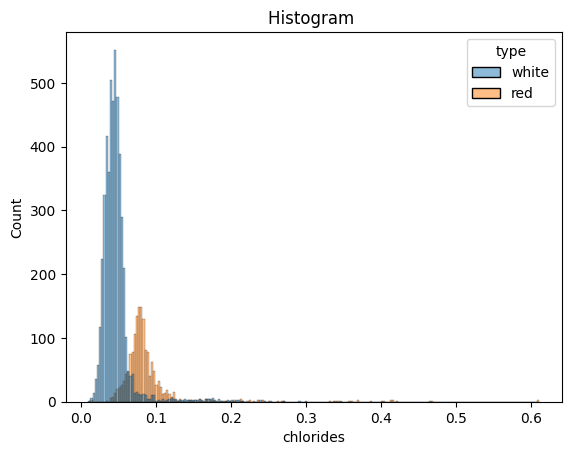

In [173]:
sns.histplot(df, x="chlorides" , hue= 'type')
plt.title('Histogram ')
plt.show()

#### The Above histogram depict that most of red wine contains proportion of salt around 0.08 and white contains 0.04 approx.

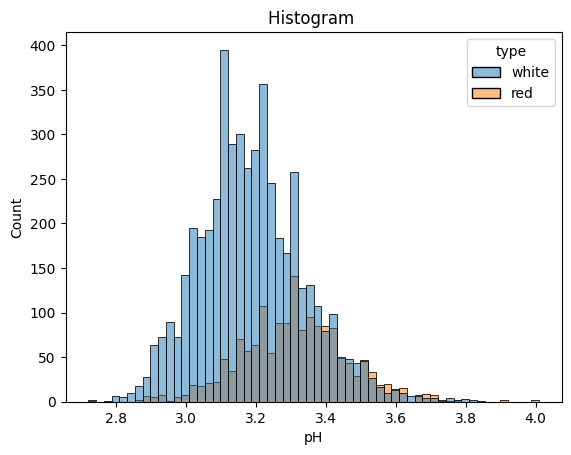

In [174]:
sns.histplot(df, x="pH" , hue= 'type')
plt.title('Histogram ')
plt.show()

#### The Above histogram depict that most of red wine contains ph value around 3.31 and white contains 3.18 approx.

## Box plot and Violin plots for all features

In [175]:
def numerical_feature_box_violin_plot(df, x, title):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12,10))
    sns.boxplot(data=df, x=x, ax=ax[0])
    ax[0].set_title('Boxplot')
    sns.violinplot(data=df, x=x, inner='quartile', ax=ax[1])
    ax[1].set_title('Violin plot')
    plt.title(title)
    plt.show()
    


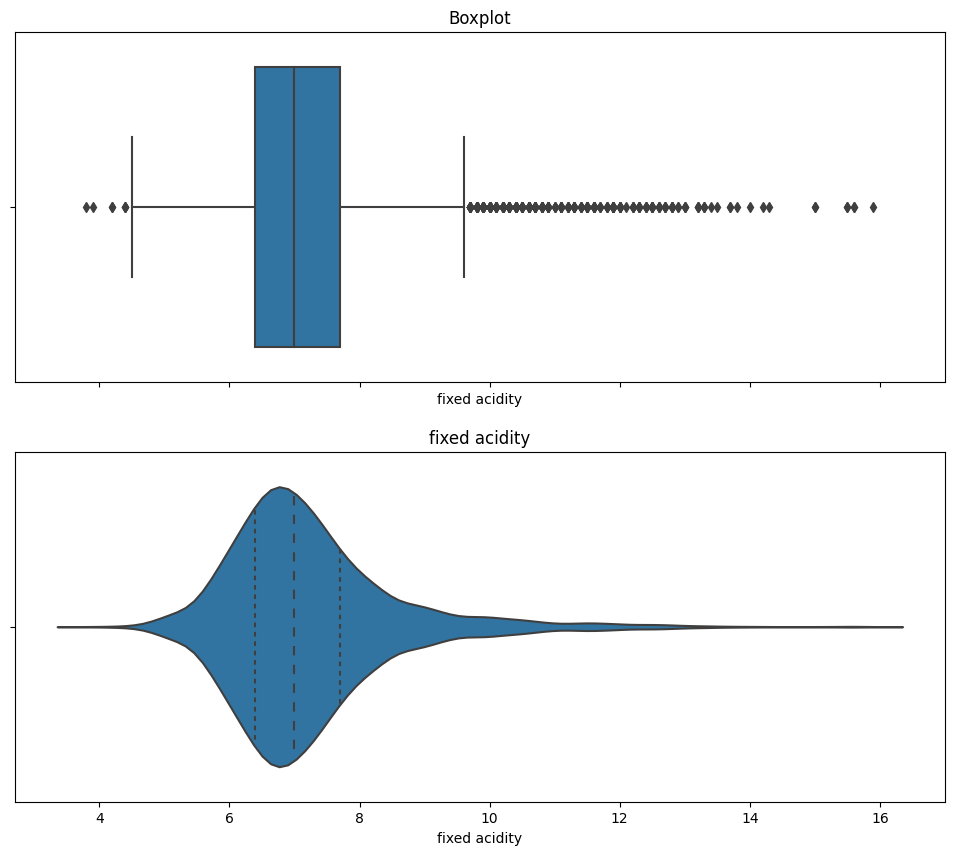

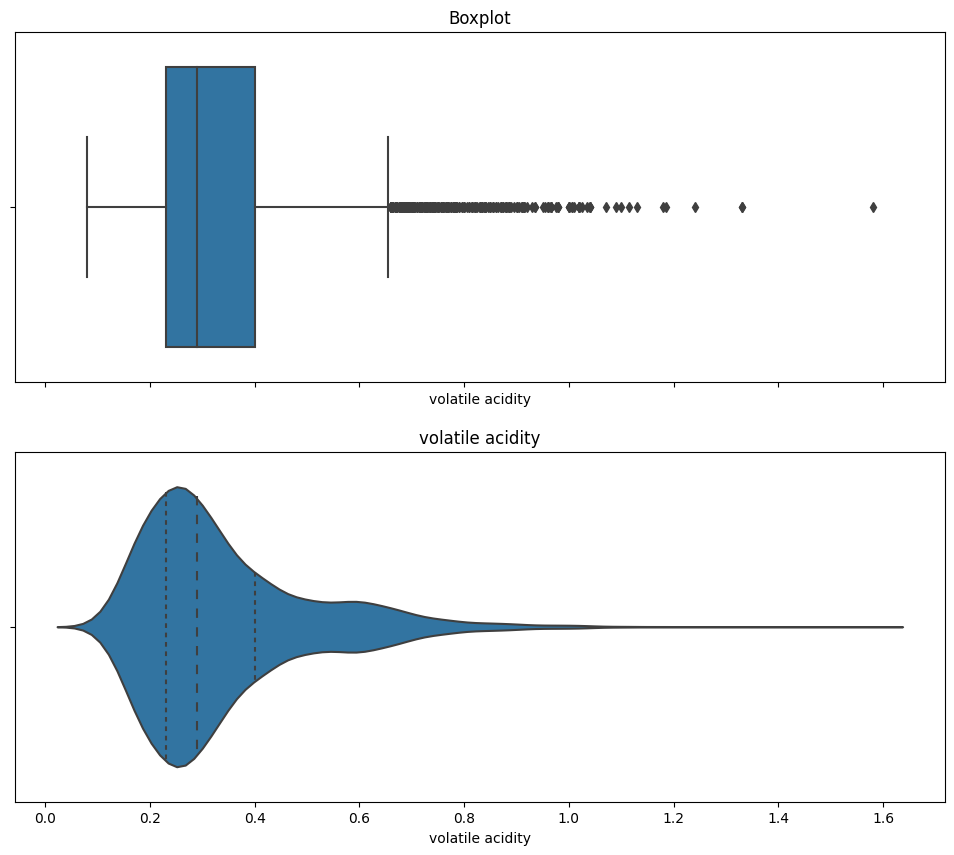

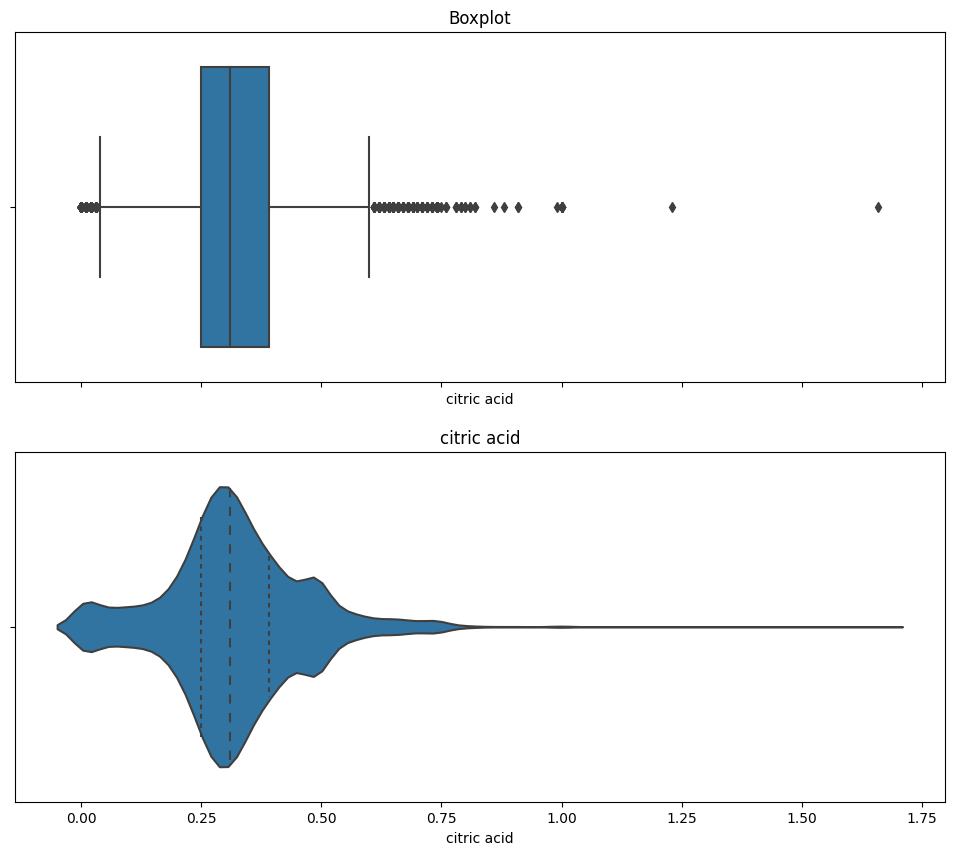

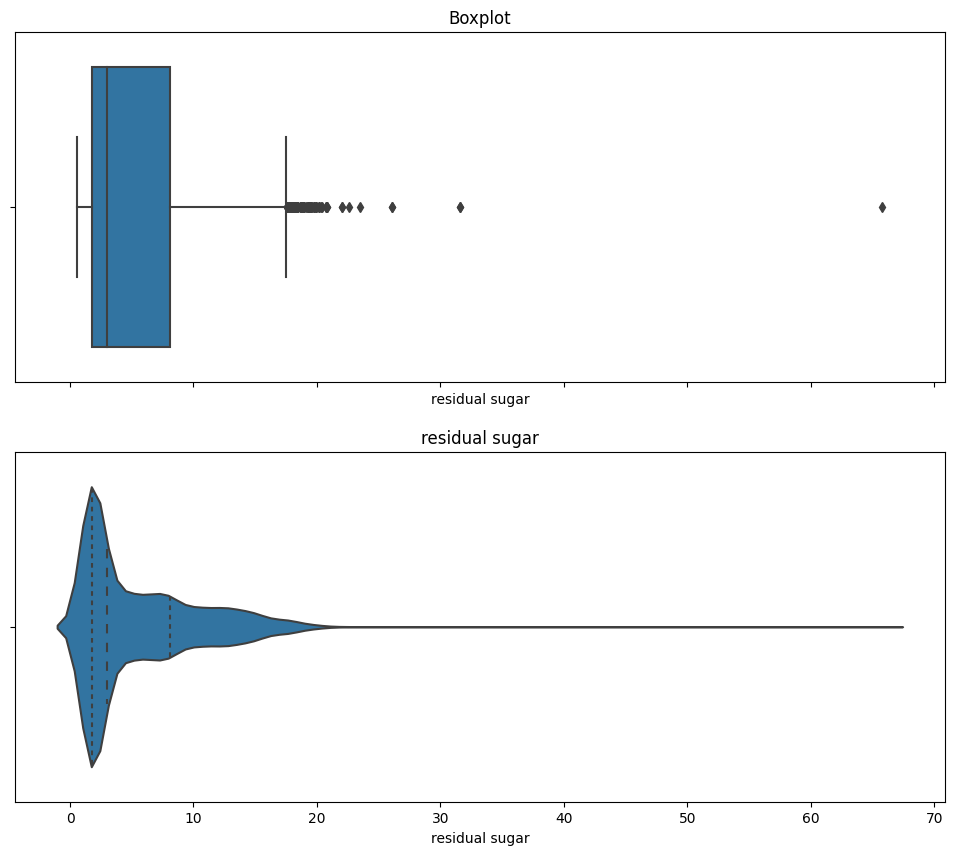

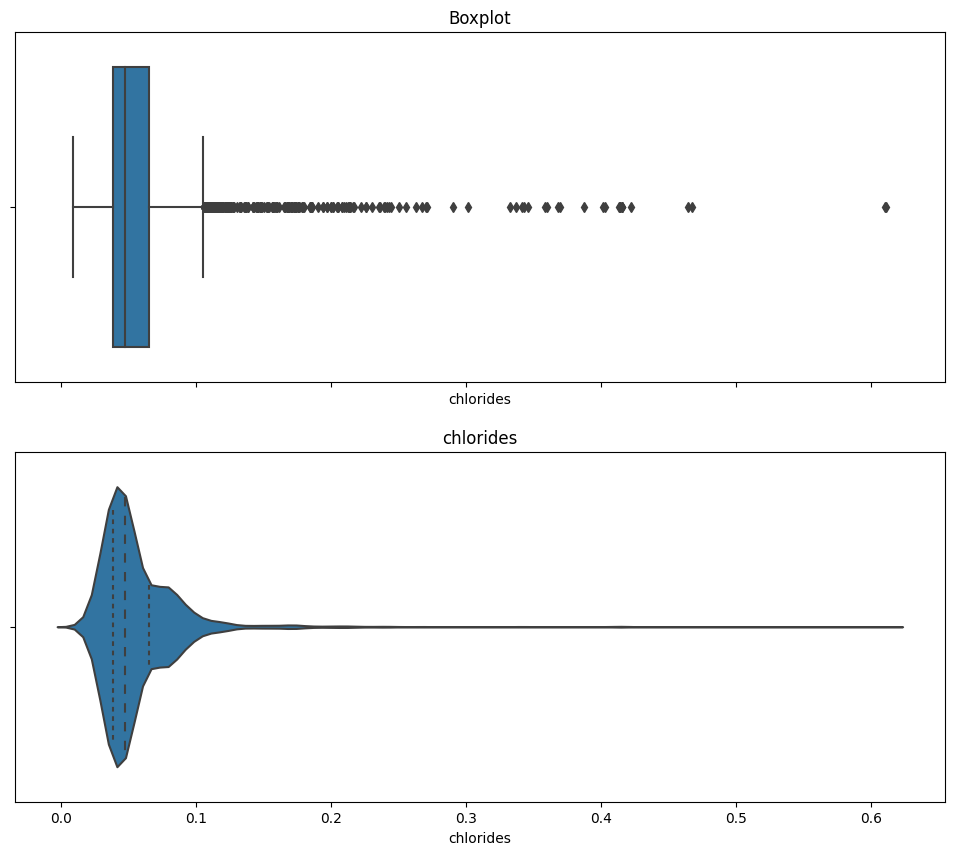

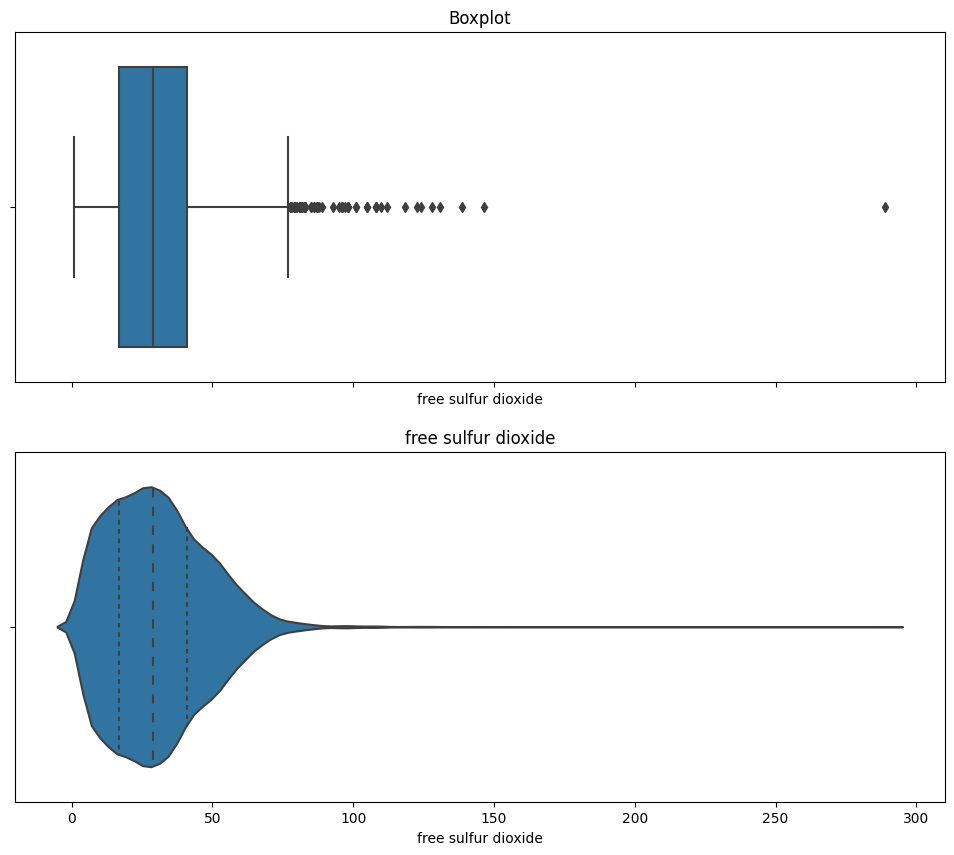

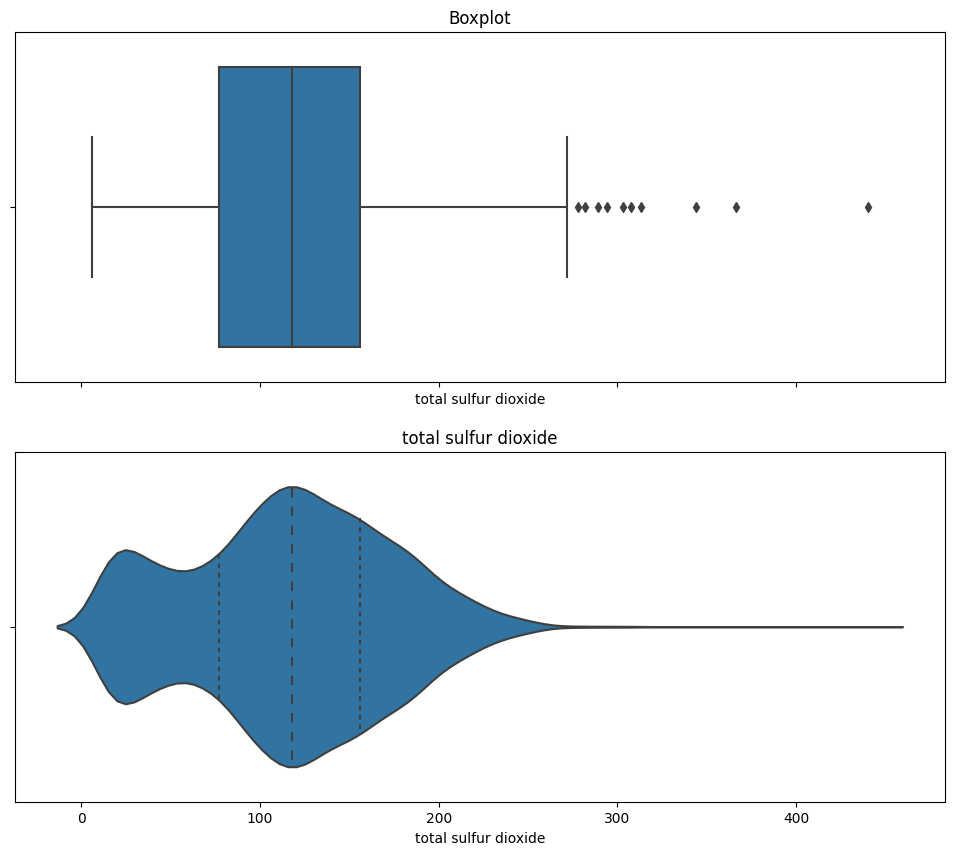

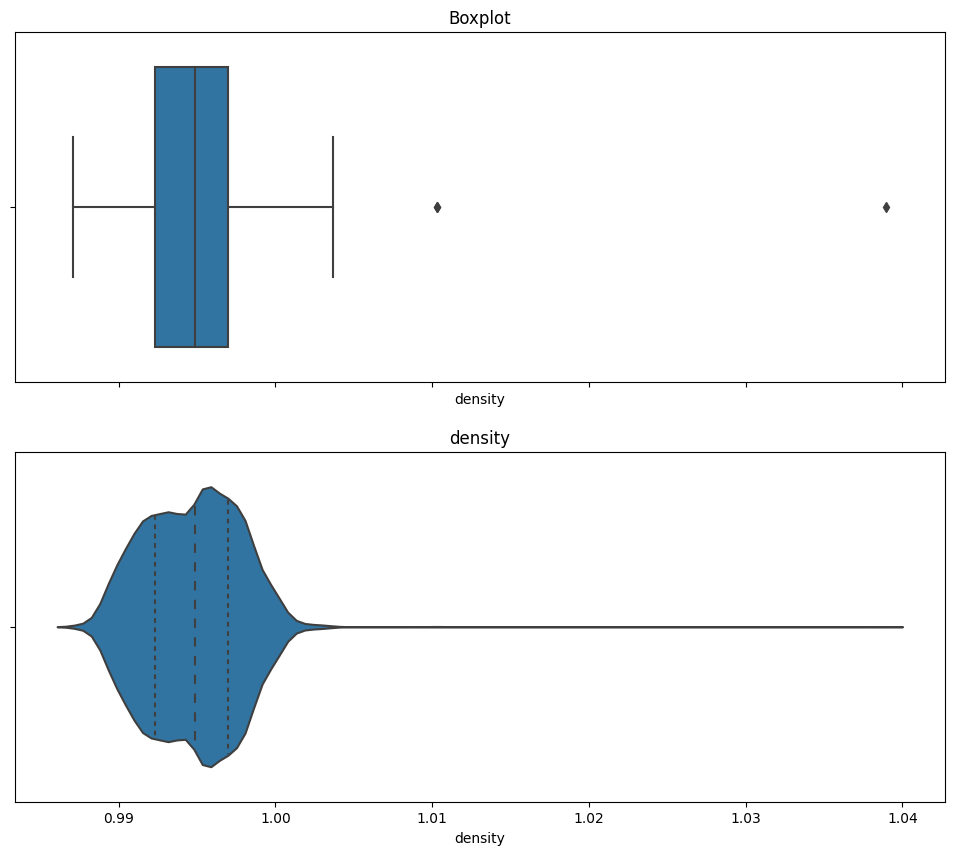

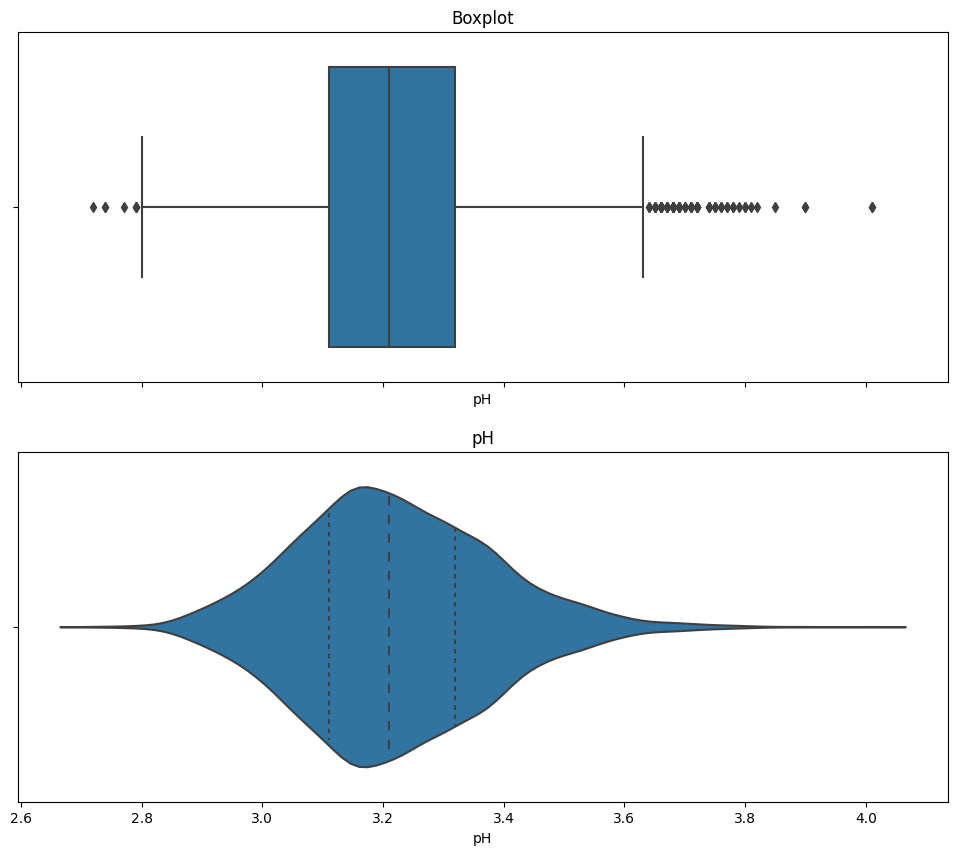

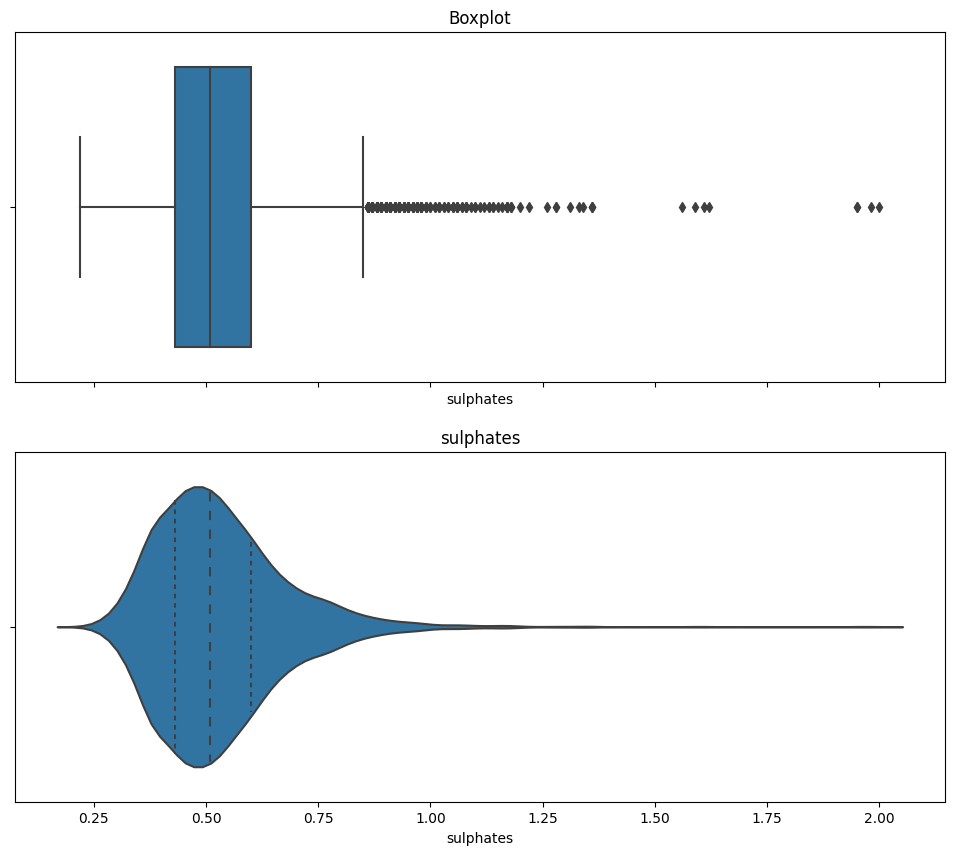

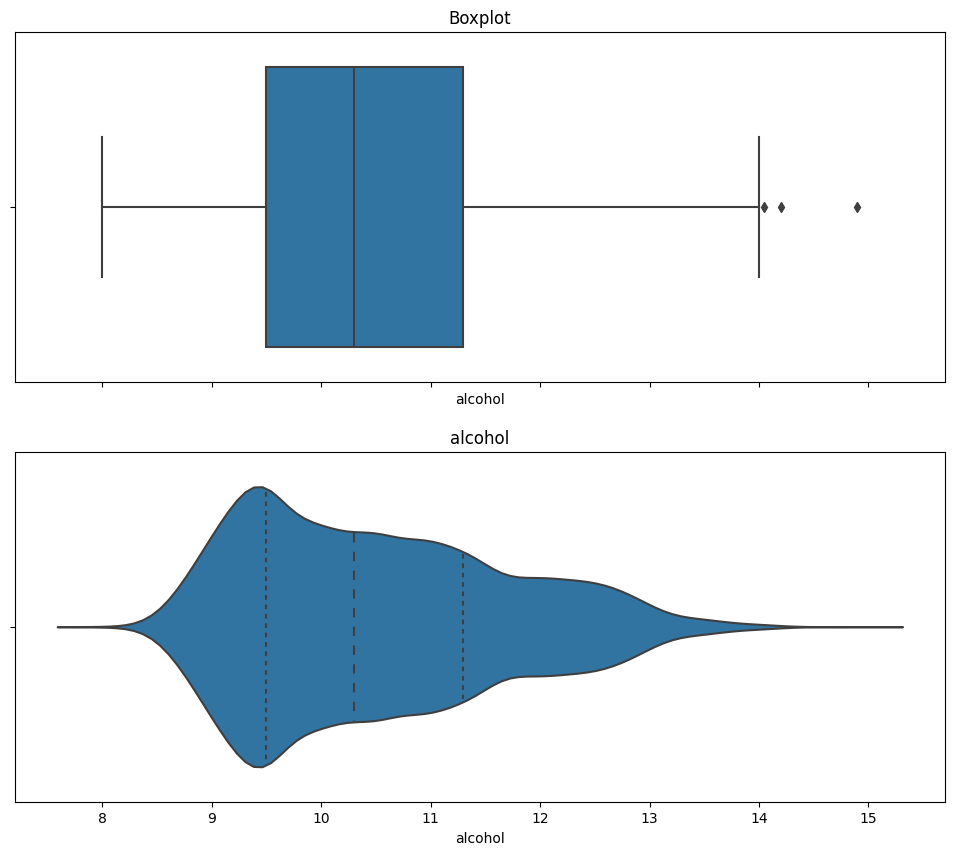

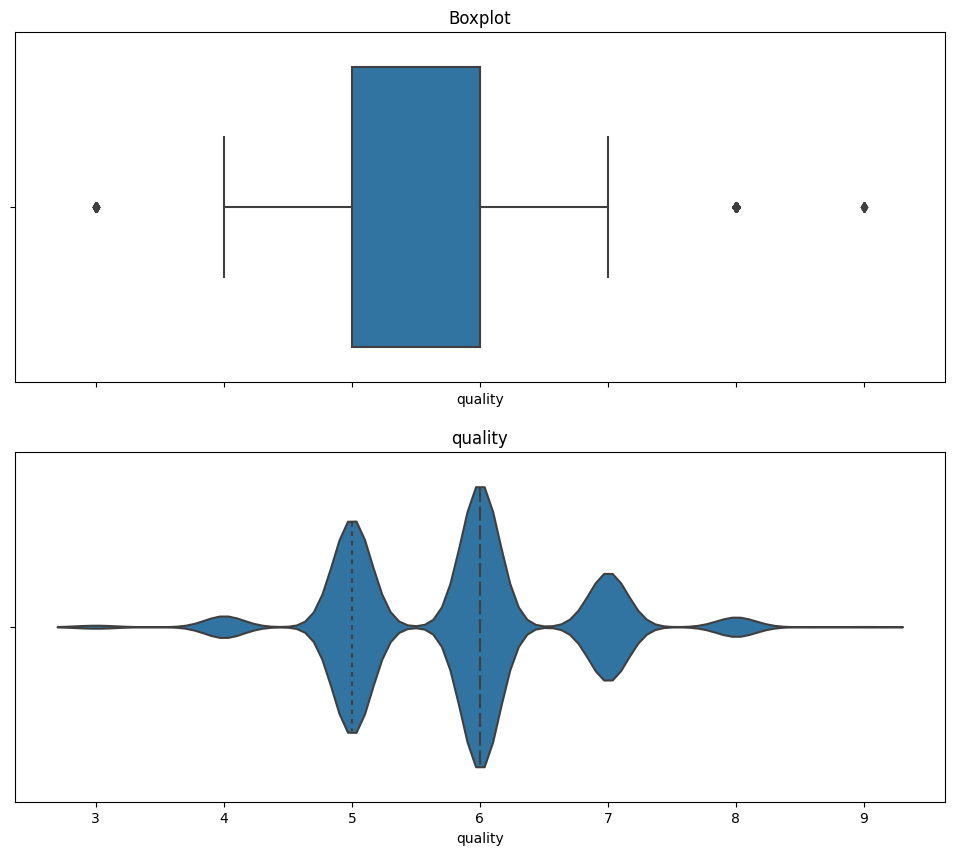

In [176]:

for column in df.columns:
    if is_numeric_dtype(df[column]):
        numerical_feature_box_violin_plot(df, column, column)

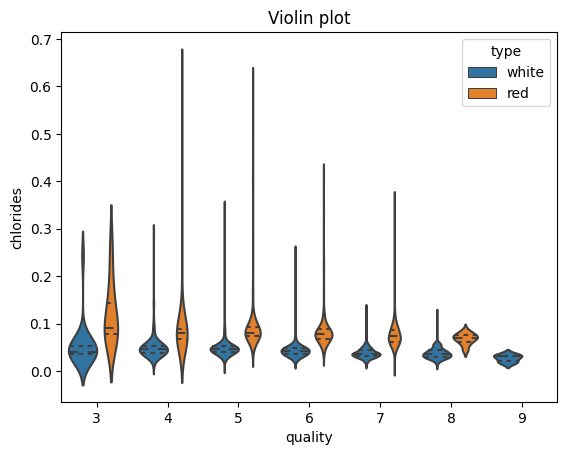

In [177]:
sns.violinplot(data=df, x="quality", y="chlorides", inner='quartile', hue='type')
plt.title('Violin plot')
plt.show()

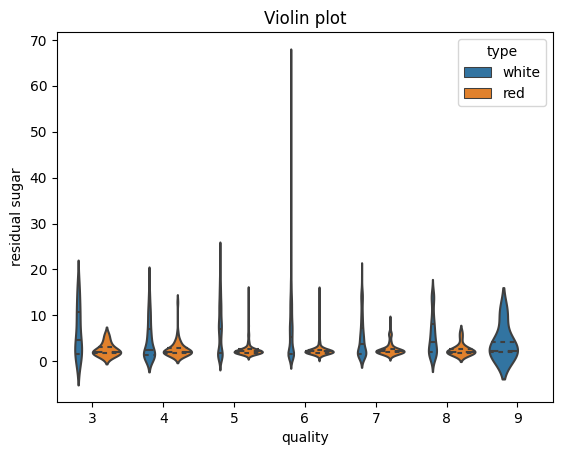

In [178]:
sns.violinplot(data=df, x="quality", y="residual sugar", inner='quartile', hue='type')
plt.title('Violin plot')
plt.show()

#### From above violinplot we can see that white wine contains more sugar level than red wine

### Matrix of Scatter Plots

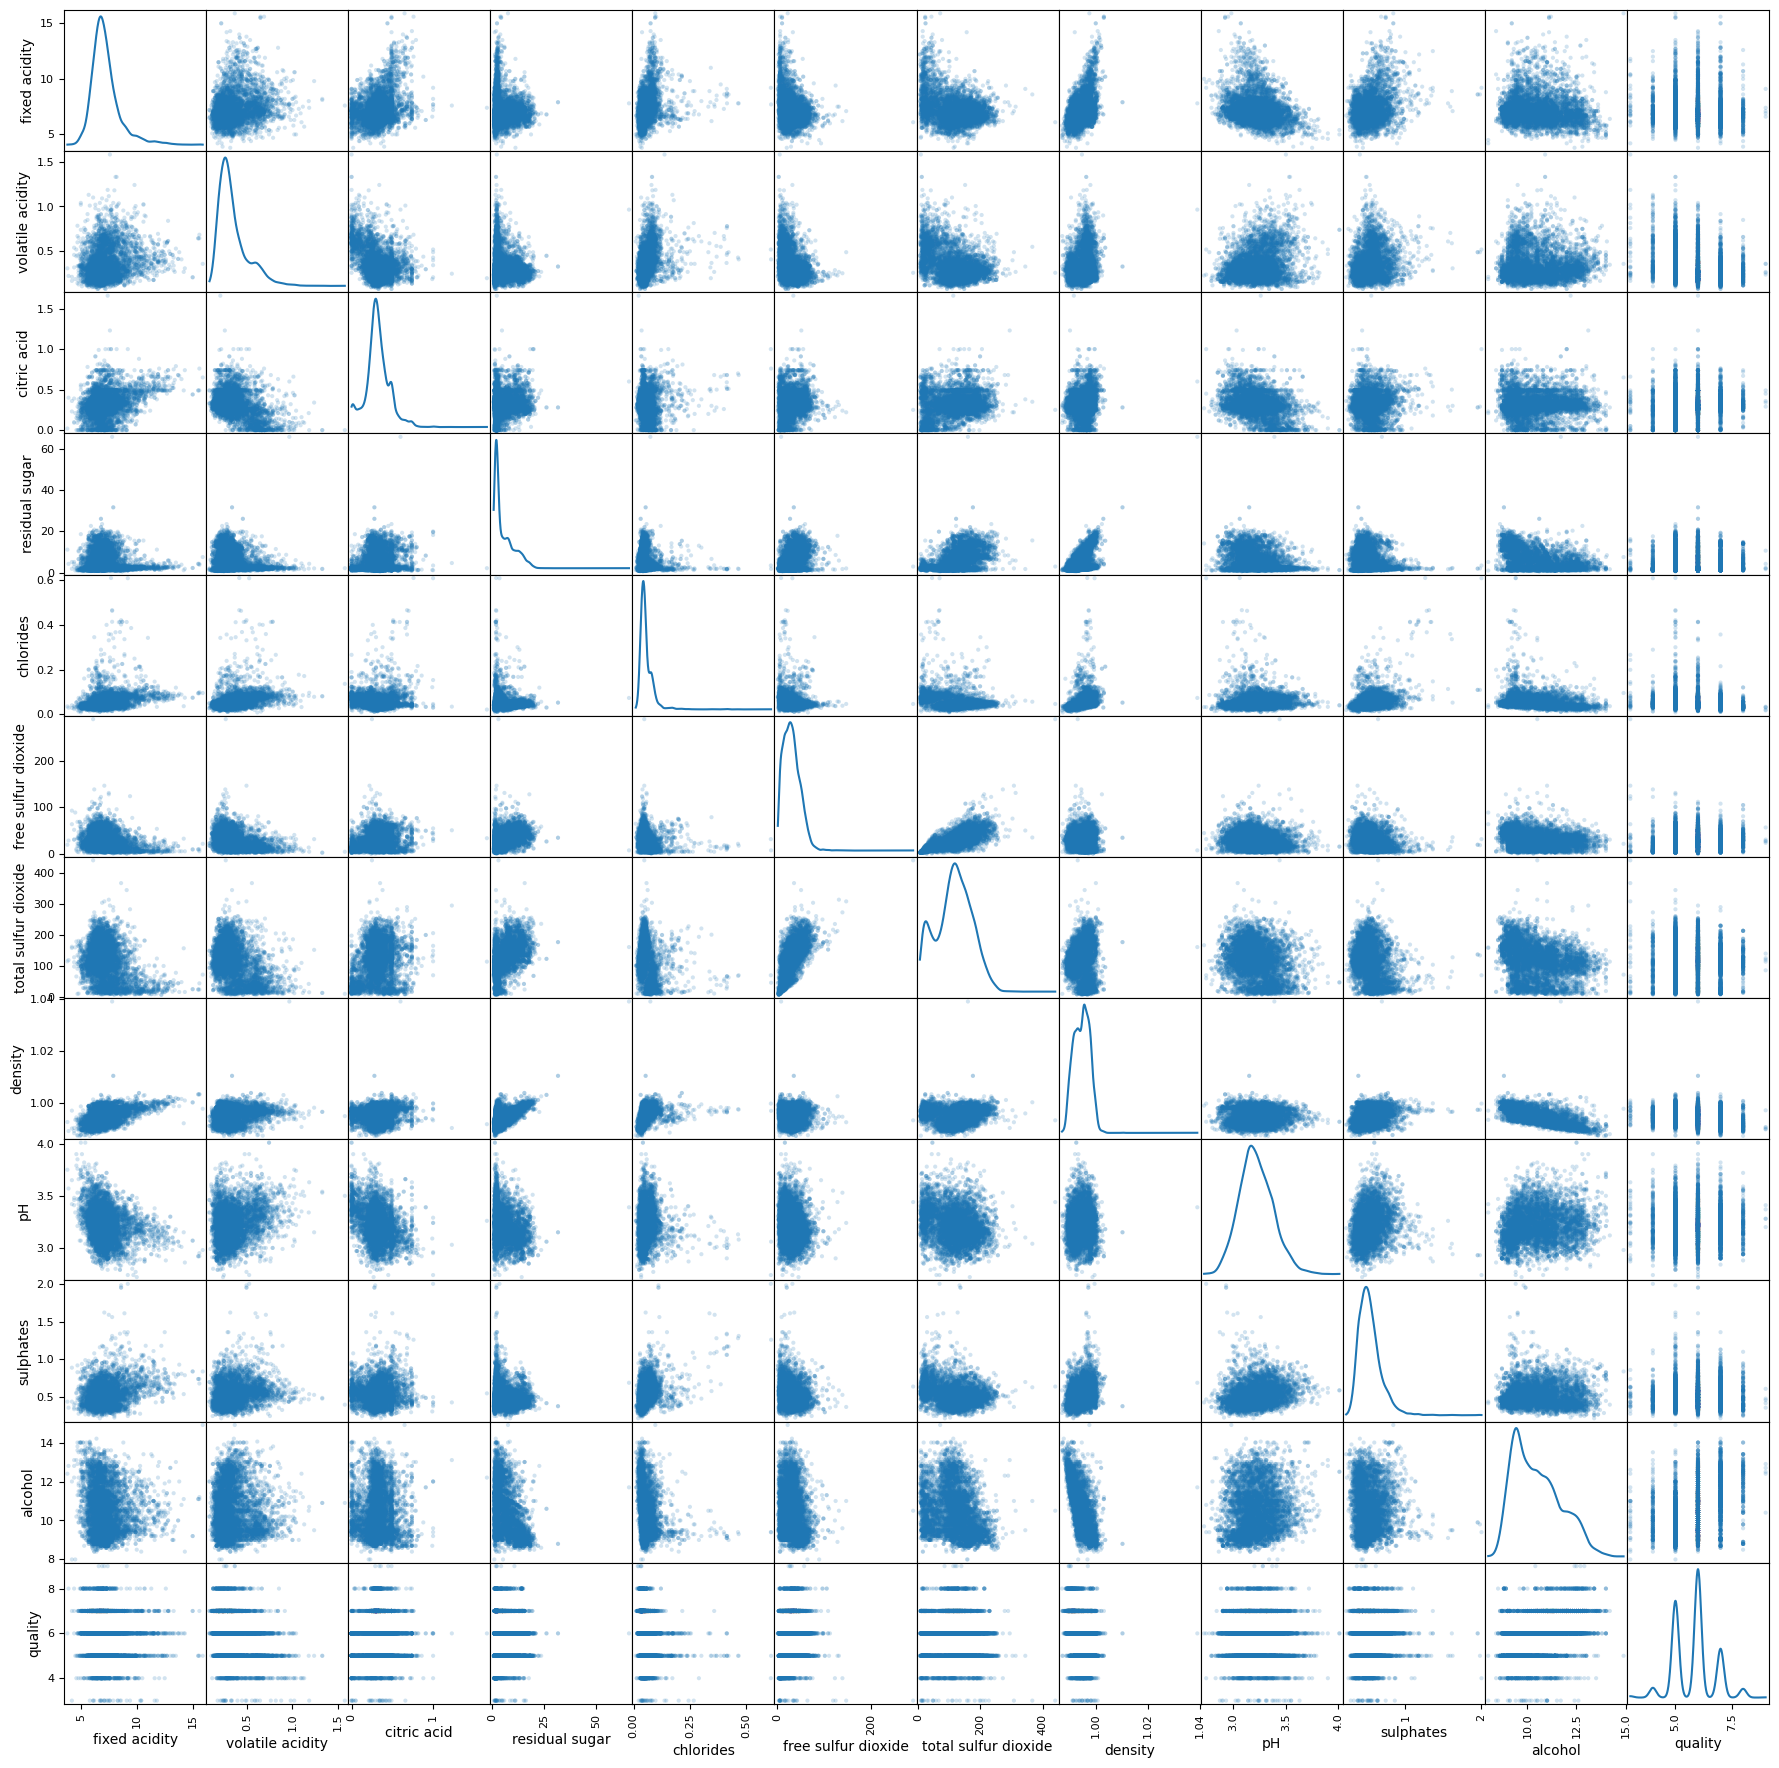

In [179]:
scatter_matrix(df, alpha = 0.2, figsize = (22,22), diagonal = 'kde')
plt.show()

### Preprocessing-  dealing with missing values

#### Below are the numbers of missing values as per different features from the dataset

In [180]:
missing_vals = df.isna().sum()
print(missing_vals[missing_vals > 0])

fixed acidity       10
volatile acidity     8
citric acid          3
residual sugar       2
chlorides            2
pH                   9
sulphates            4
dtype: int64


In [181]:
print("mean of 'fixed acidity' " ,df['fixed acidity'].mean())
print("mean of 'volatile acidity' " ,df['volatile acidity'].mean())
print("mean of 'citric acid' " ,df['citric acid'].mean())
print("mean of 'chlorides' " ,df['chlorides'].mean())
print("mean of 'pH' " ,df['pH'].mean())
print("mean of 'sulphates' " ,df['sulphates'].mean())


mean of 'fixed acidity'  7.2165793124710955
mean of 'volatile acidity'  0.33969101556480197
mean of 'citric acid'  0.3187218971358176
mean of 'chlorides'  0.05604157043879908
mean of 'pH'  3.218395499383477
mean of 'sulphates'  0.531215154782073


#### Filling all null values with mean of that columns

In [182]:
df.fillna(df.mean(), inplace=True)

In [183]:
df.groupby(["type"]).count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,
red,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599
white,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898


### Target Variable 

#### There are two type of supervised learning operations which can be performed on above Wine Quality dataset.

- Classification - we can perform classification on feature(Column) "quality" which range from 3-9

- Classification - we can perform classification on feature(Column) "type" ie red and white wine where we can classify between those two types of wines

In [184]:
classification_target= df['type'].unique()
print(classification_target)

['white' 'red']


- Regression - we can perform regression on feature(Column) "quality" which ranges from 3-9. Using the above dataset we can predict the quality of wine seperatly for red and white wine.
- Using the regression technique we can reduce the cost that is being paid to the tasters.

In [185]:
regression_target = df['quality'].unique()
print(regression_target)

[6 5 7 8 4 3 9]


## Correlation 

#### - Pearson correlations

In [186]:
corr= df.corr(method='pearson')

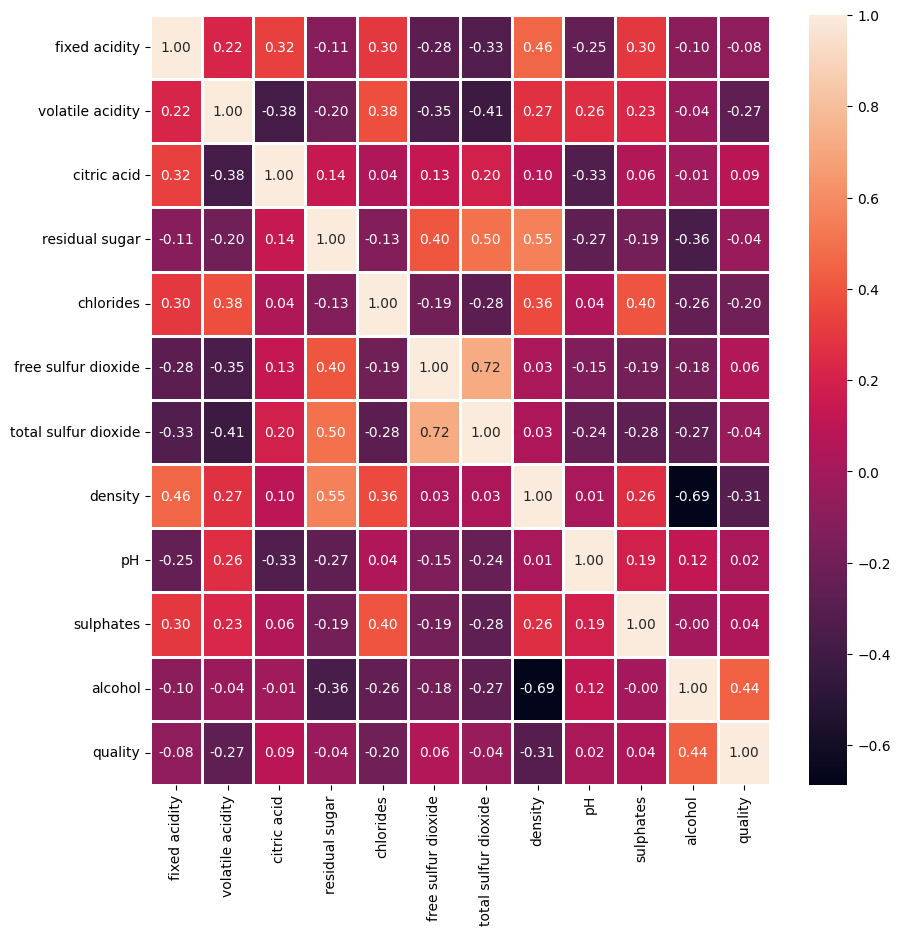

In [187]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True,ax=ax,linewidths=1, fmt = '.2f')
plt.show()

## Data Story

- There are three distinct patterns to be seen. First, there are favorable correlations between quality and critic acid, alcohol, and sulphates. Higher alcohol content in wines may make them less popular, but they should still be highly regarded for quality

- Second, there are negative correlations between quality and volatile acidity, density, and pH. It seems sense that wines with less sweetness and less acidity are preferred in quality tests.

- Additionally, there is no clear correlation between these independent variables and quality: Chlorides, total sulfur dioxide, and residual sugar



### Formulating the Null Hypothesis

- H0: The red wine's acidity is equal to the white wine acidity
- H1: The red wine's acidity is not equal to the white wine acidity

In [188]:
red_df=df[df['type']=='red']
white_df=df[df['type']=='white']

In [189]:
red_sample_pH = red_df["pH"]
white_sample_pH = white_df["pH"]
red_sample_pH = red_sample_pH.sample(n=1000)
white_sample_pH = white_sample_pH.sample(n=1000)

In [190]:
scipy.stats.ttest_ind(red_sample_pH, white_sample_pH)

Ttest_indResult(statistic=17.296324526427778, pvalue=1.435784203952015e-62)

#### As we can see that the P- value < 0.05 

- Reject H0 and Accept H1
- The red wine's acidity is not equal to the white wine acidity

# Mini Project Part-2

In [191]:
import scipy.stats as st
import plotly.graph_objects as go
from sklearn import preprocessing
from sklearn.metrics import f1_score, confusion_matrix,accuracy_score, classification_report
from scipy import stats
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  cross_val_score,KFold,train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### We will perform operations on White wine dataset

In [192]:
#Creating new Dataframe

#Selecting white Wine dataset
white_wine_df= df[df['type']=='white']

#Dropping the column type
white_wine_df.drop('type', inplace=True, axis=1)



In [193]:
fig = go.Figure(data=[go.Pie(labels=df['quality'].value_counts().index, values=df['quality'].value_counts(), hole=.3)])
fig.update_layout(legend_title_text='Quality', title= "Wine Quality Proportation")
fig.show()

In [194]:
# # import warnings
# warnings.filterwarnings('ignore')
# fig,ax = plt.subplots(12,3,figsize=(30,90))
# for index,i in enumerate(df.columns):
#     if is_numeric_dtype(df[i]):
# #         print(index)
# # #         sns.distplot(df[i],ax=ax[index,0],color='green')
# #         sns.histplot(x=df[i],ax=ax[index,0],color='green', kde=True)
# #         sns.boxplot(df[i],ax=ax[index,1],color='yellow')
# #         stats.probplot(df[i],plot=ax[index,2])
    
# # fig.tight_layout()
# # fig.subplots_adjust(top=0.95)
# # plt.suptitle("Visualizing continuous columns",fontsize=50)

## Histogram & Q-Q Plots

In [195]:
def numerical_feature_box_plot(df, x, index):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,15))
#     sns.boxplot(data=df, x=x, ax=ax[0],color='red')
#     ax[0].set_title('Boxplot')
    sns.histplot(x=df[column],ax=ax[0],color='green', kde=True)
    ax[0].set_title('Histogram plot')
    
    stats.probplot(df[x],plot=ax[1])
    ax[1].set_title('Probability Plot')
    
    plt.title(x)
    plt.show()
    

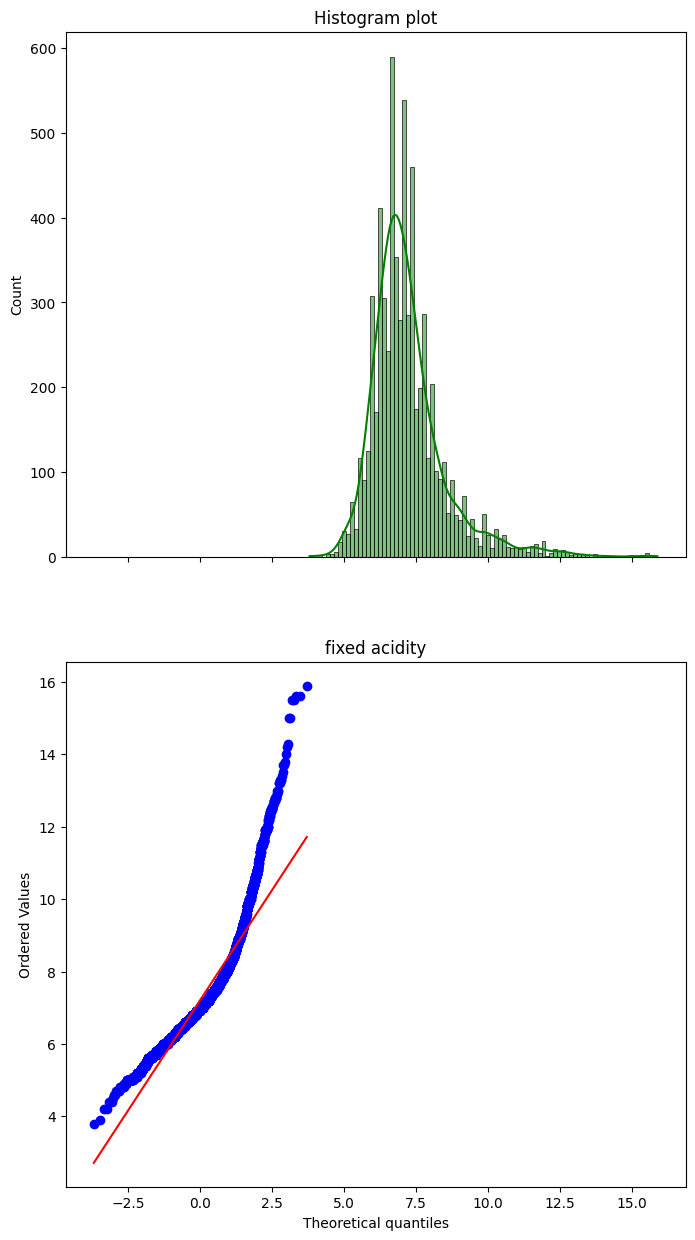

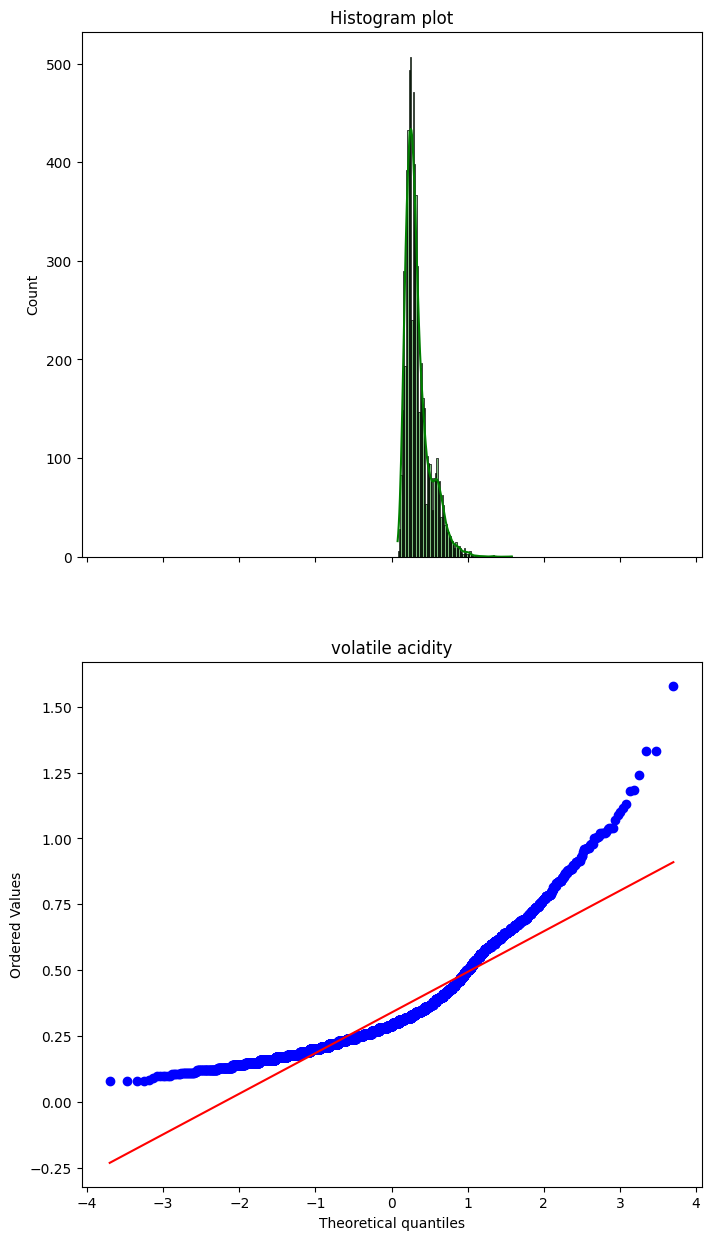

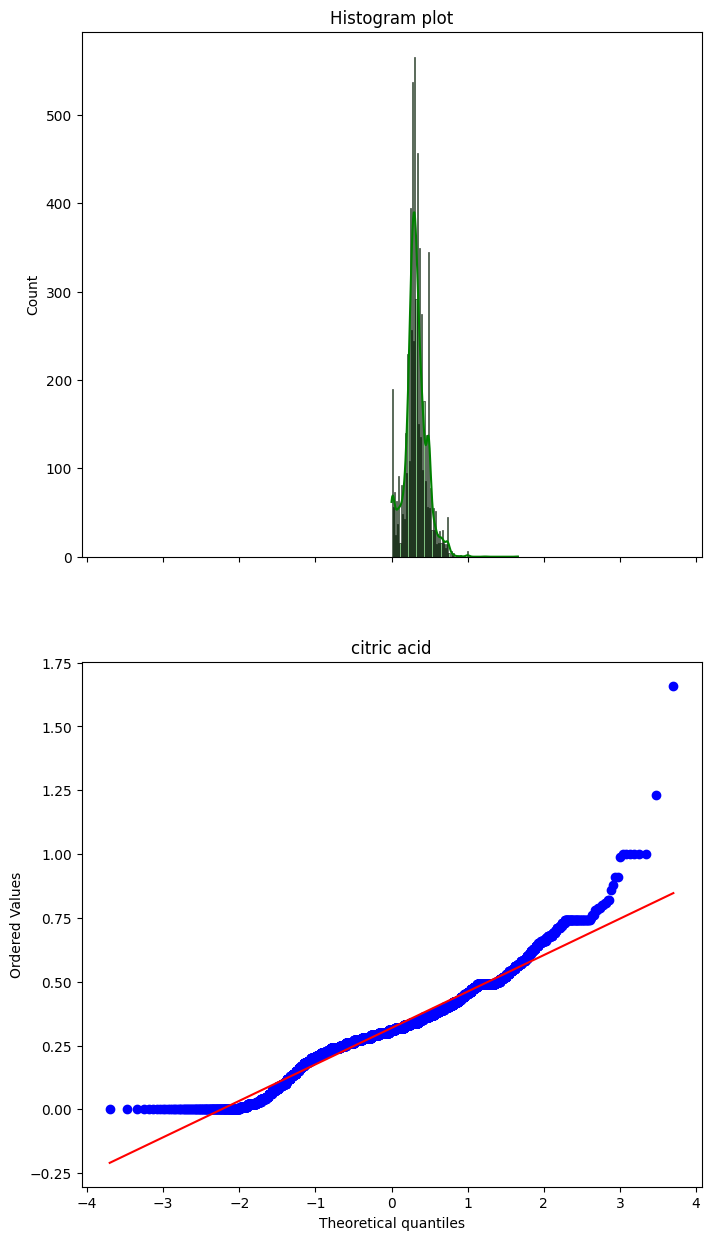

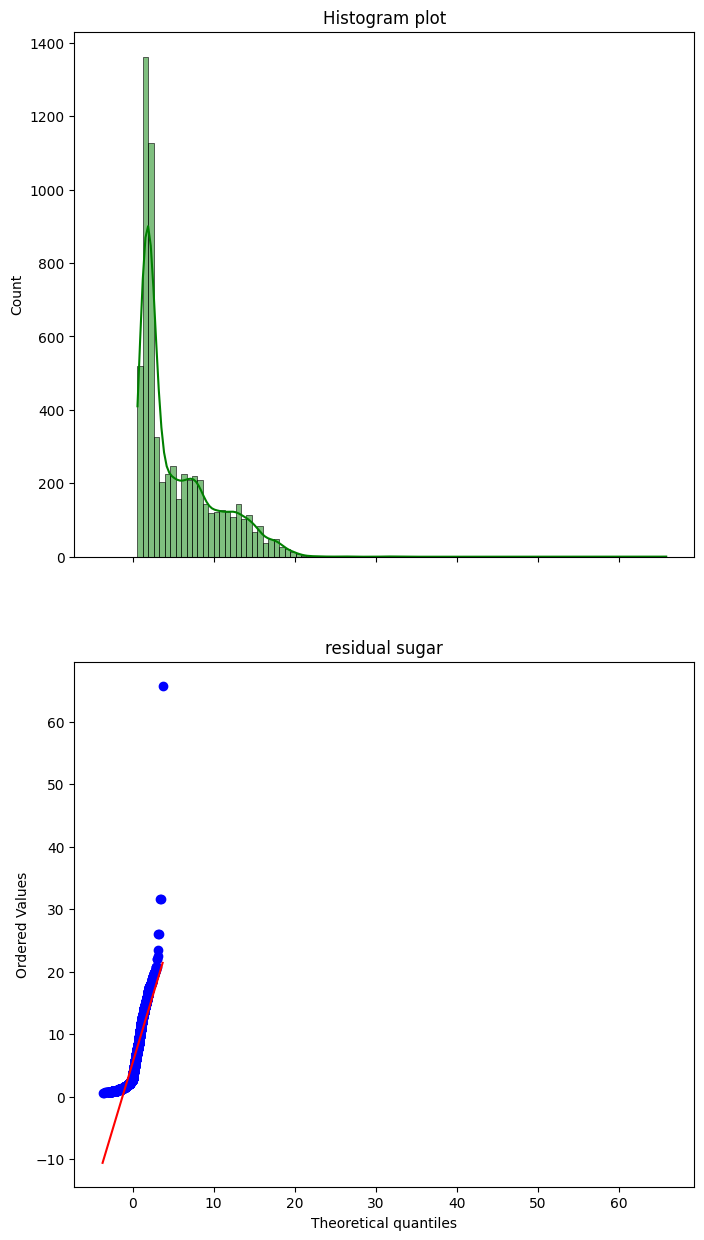

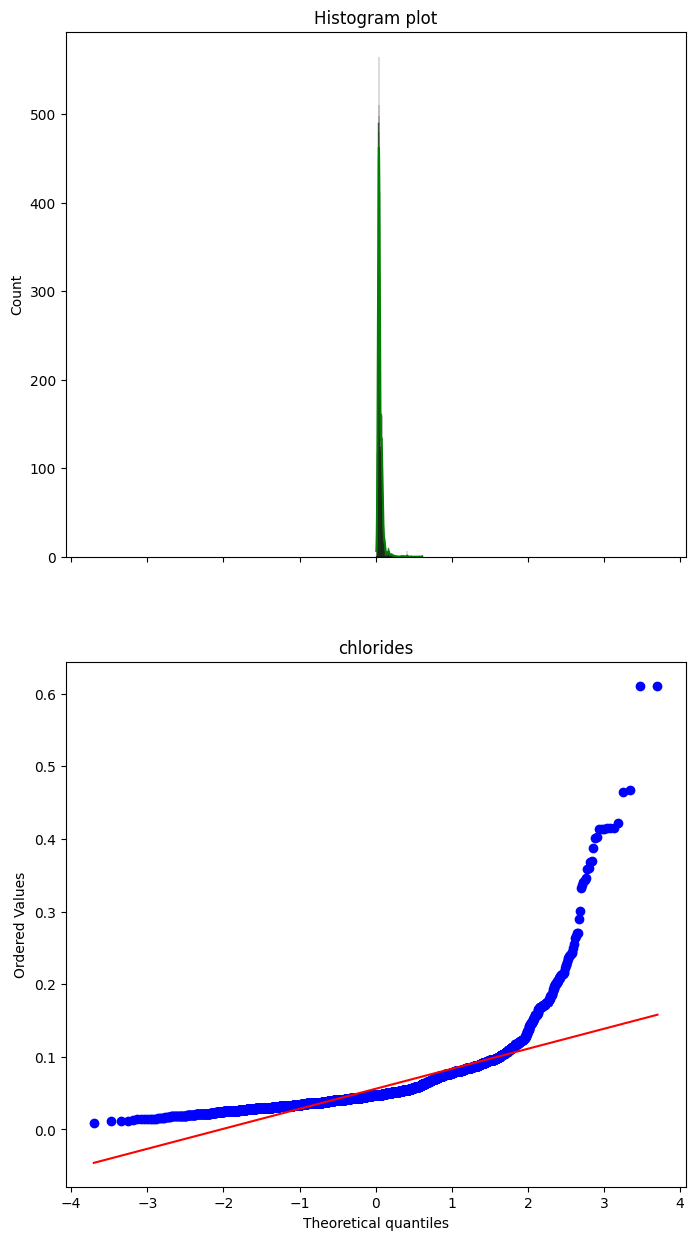

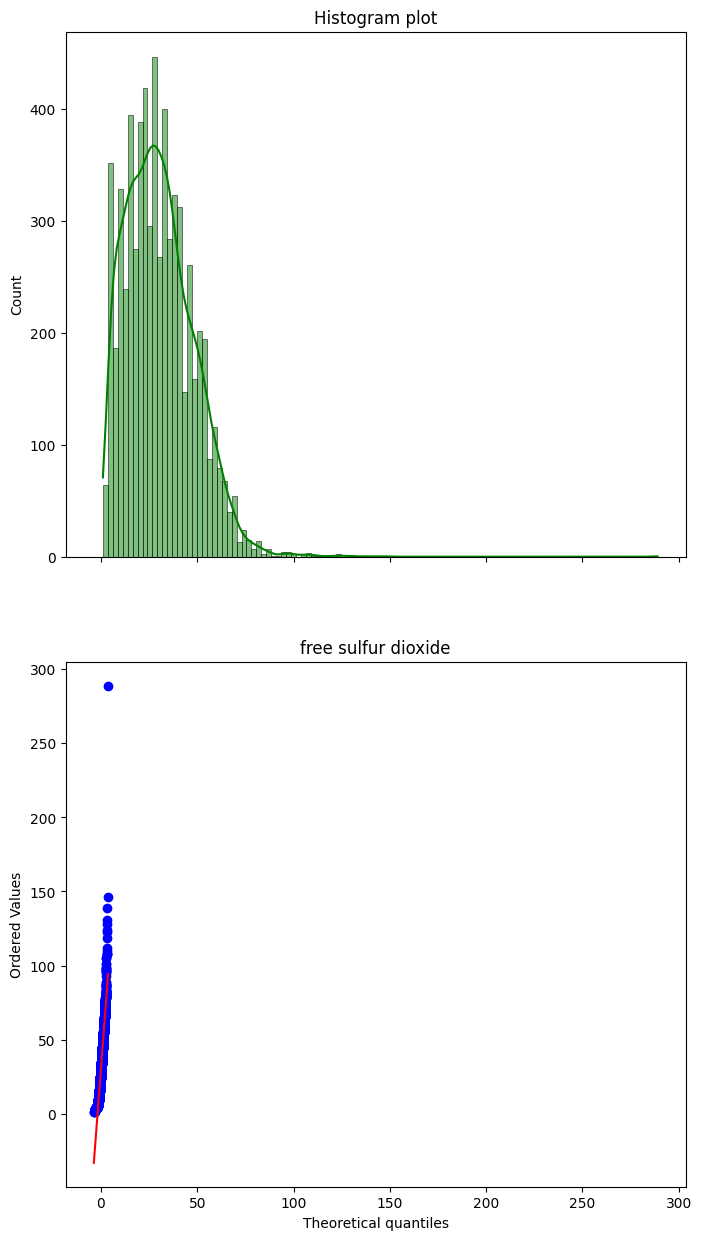

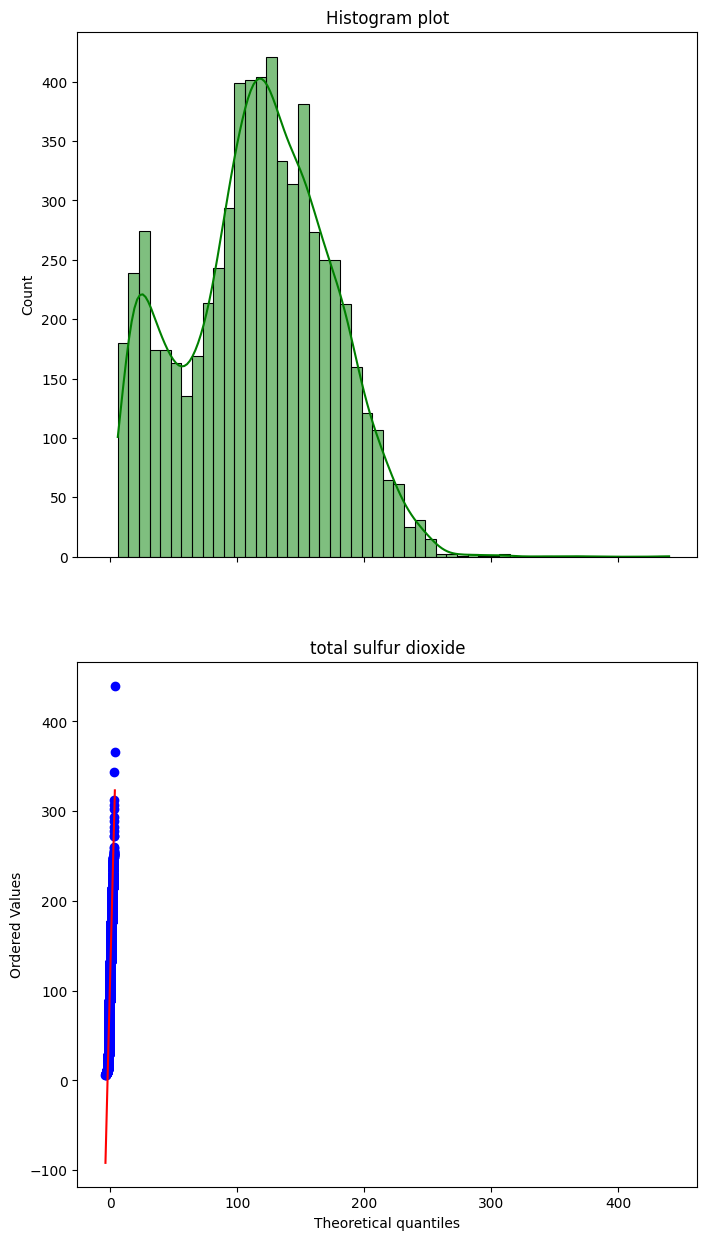

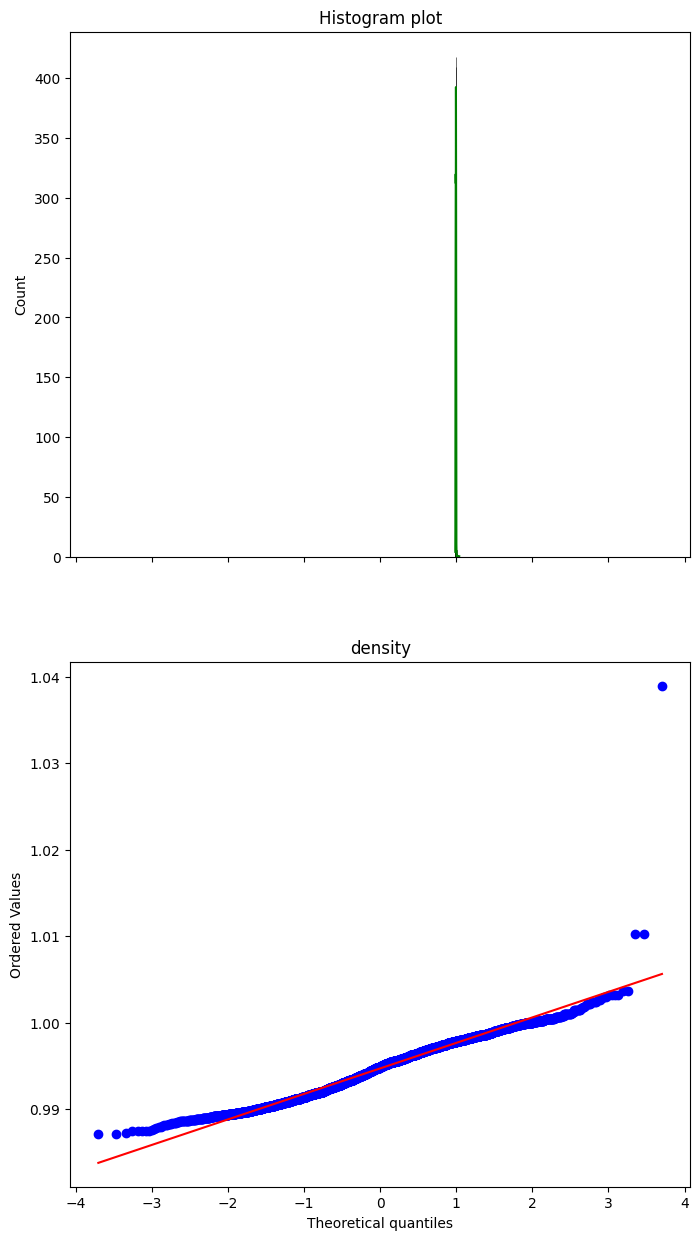

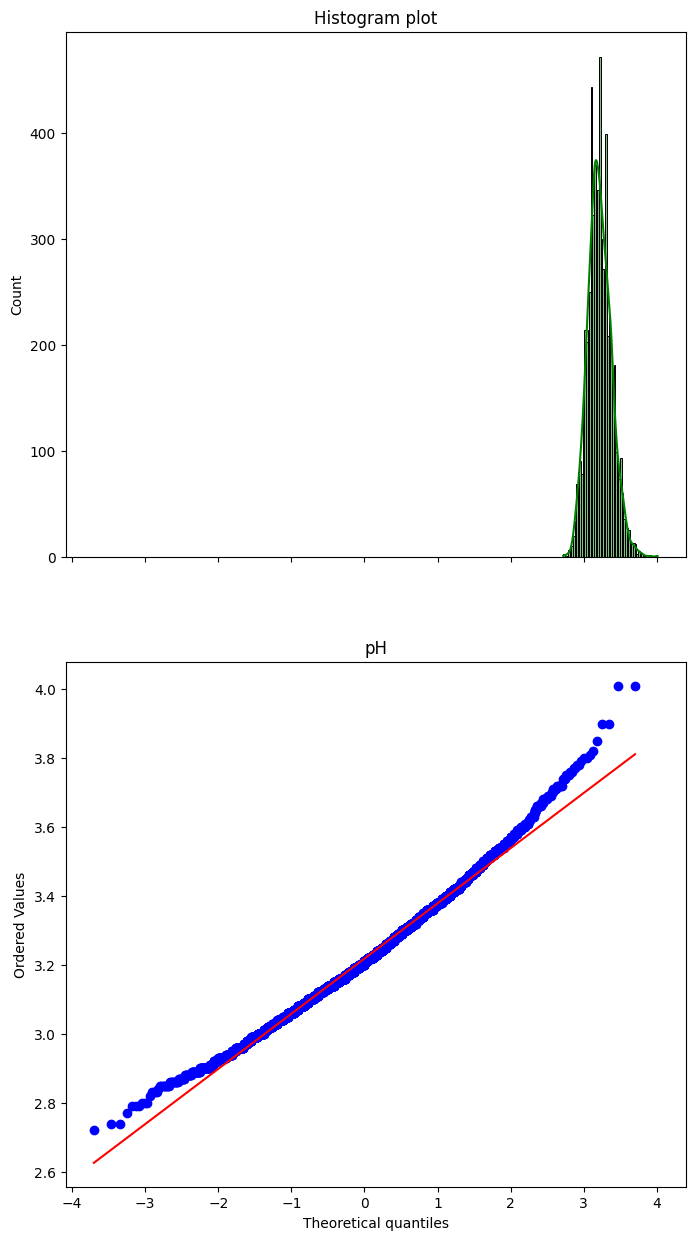

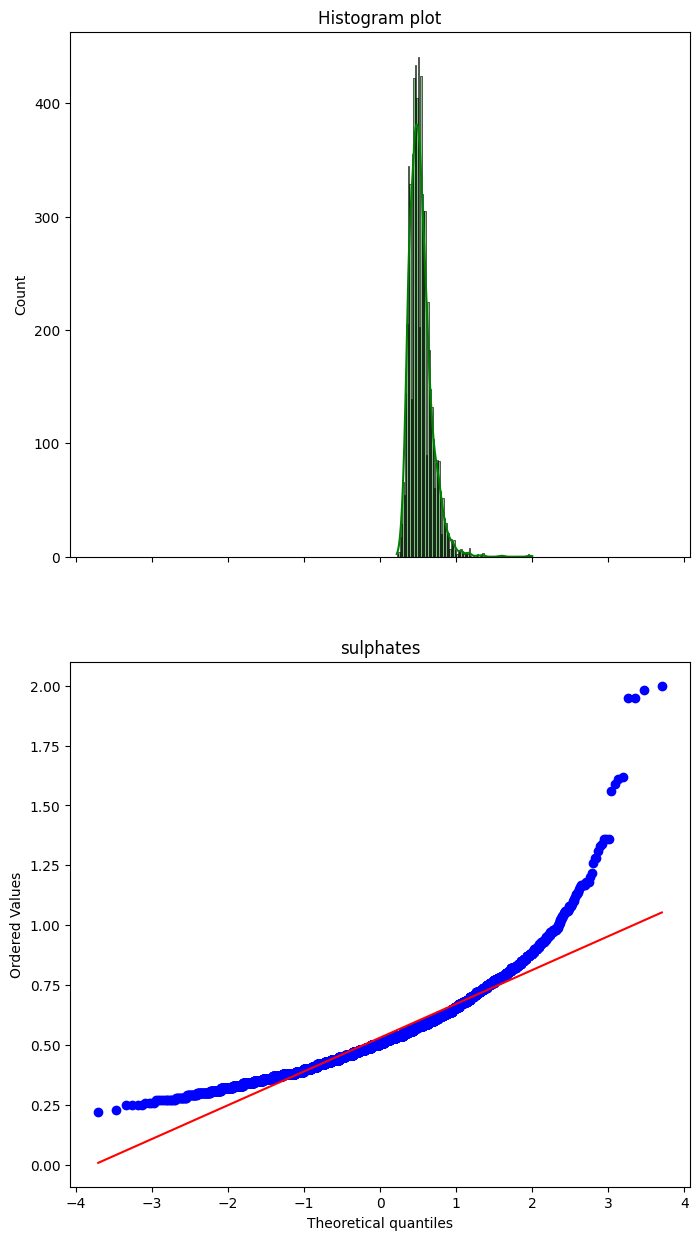

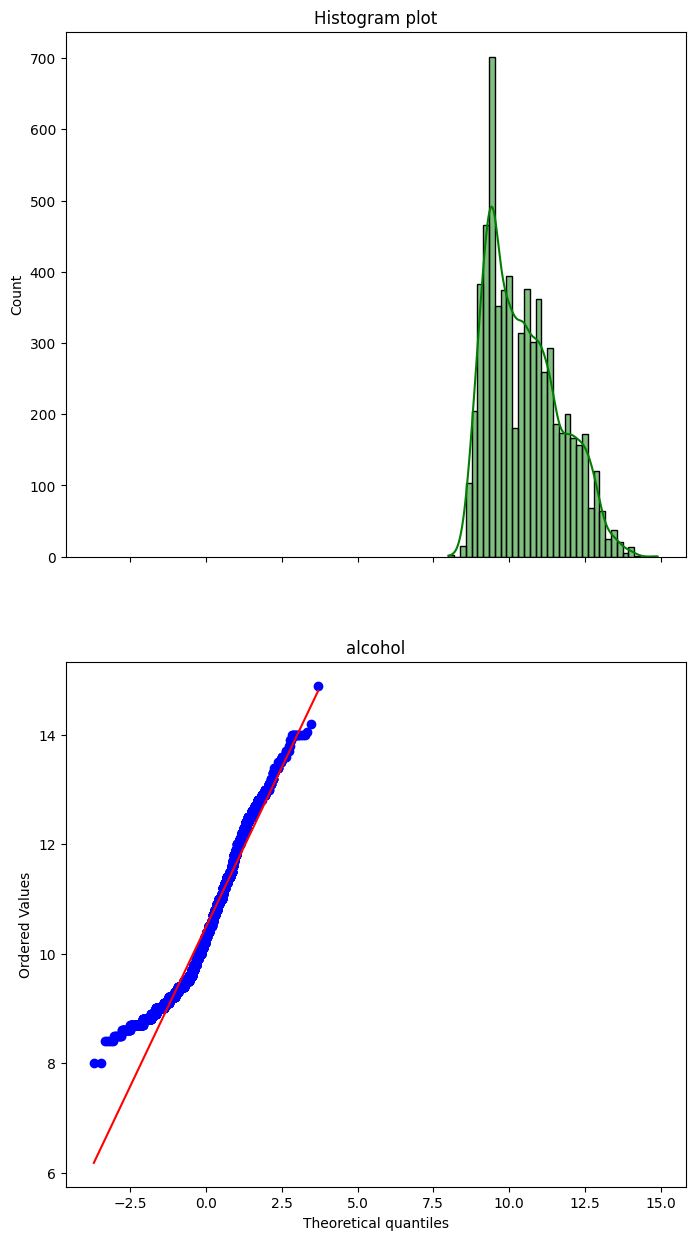

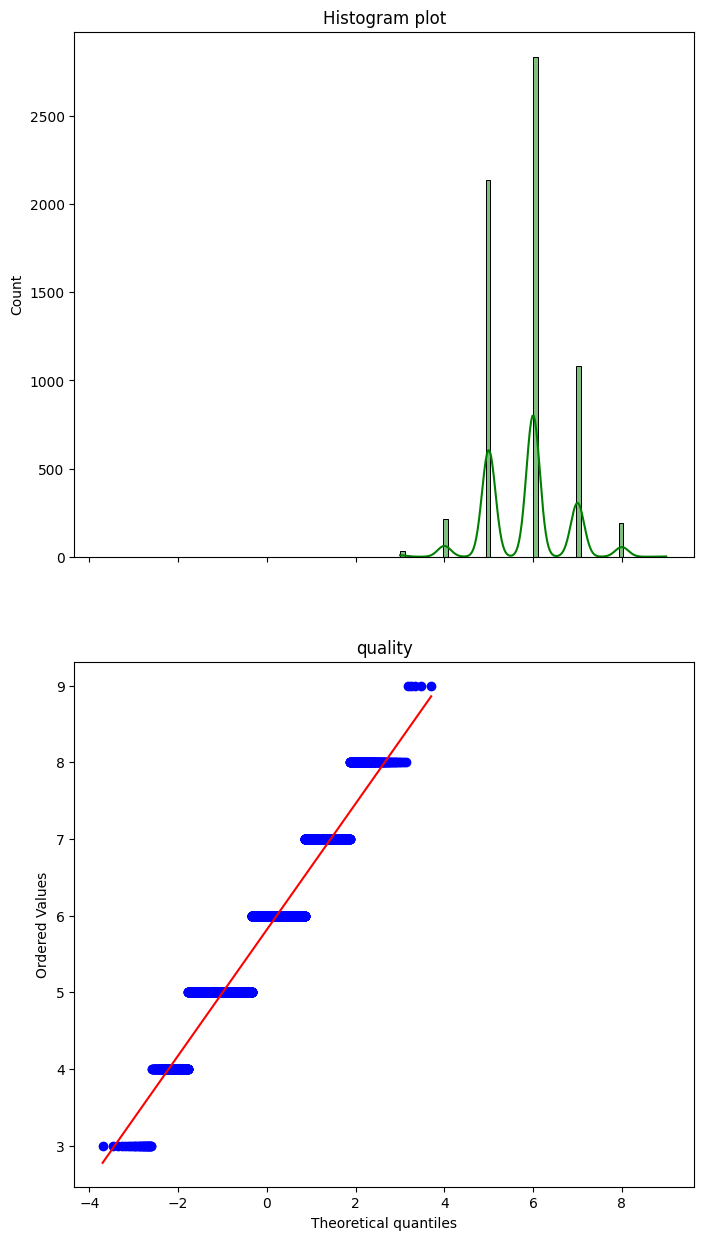

In [196]:

for index,column in enumerate(df.columns):
    if is_numeric_dtype(df[column]):
#         print(column)
        numerical_feature_box_plot(df, column, index)

### Shapiro-Wilk Test

In [197]:
from scipy.stats import shapiro

x=white_wine_df.loc[:, white_wine_df.columns != 'quality']

for i in x.columns:
    print(f'{i}: {"Does Not Follow Gaussian Distribution" if shapiro(x[i])[1]<0.05 else "Follow Gaussian Distribution"}')
    print(f' {shapiro(x[i])} \n')

fixed acidity: Does Not Follow Gaussian Distribution
 ShapiroResult(statistic=0.97657310962677, pvalue=1.1666289823246571e-27) 

volatile acidity: Does Not Follow Gaussian Distribution
 ShapiroResult(statistic=0.9046733975410461, pvalue=0.0) 

citric acid: Does Not Follow Gaussian Distribution
 ShapiroResult(statistic=0.9220607876777649, pvalue=9.80908925027372e-45) 

residual sugar: Does Not Follow Gaussian Distribution
 ShapiroResult(statistic=0.8847149014472961, pvalue=0.0) 

chlorides: Does Not Follow Gaussian Distribution
 ShapiroResult(statistic=0.5908502340316772, pvalue=0.0) 

free sulfur dioxide: Does Not Follow Gaussian Distribution
 ShapiroResult(statistic=0.9420648813247681, pvalue=3.847937557066661e-40) 

total sulfur dioxide: Does Not Follow Gaussian Distribution
 ShapiroResult(statistic=0.9890166521072388, pvalue=4.402653817664887e-19) 

density: Does Not Follow Gaussian Distribution
 ShapiroResult(statistic=0.954802930355072, pvalue=1.7783943830994998e-36) 

pH: Does No

#### Normalize or Standardize?
- Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution.
- Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution.

#### Conclusion
- As seen from the above Q-Q plots , most of the variables badly away from the red line at few places, which takes them far from being Gaussian.
- As seen in the result above from Shapiro-Wilk Test, No variable follows is Gaussian

- As per above analysis we will perform Normalization method to transform data

# Feature Selection

### Normalizing the data

In [198]:
#Normalizing
unormalized_df =white_wine_df.loc[:, white_wine_df.columns != 'quality']

normalized_df=(unormalized_df-unormalized_df.min())/(unormalized_df.max()-unormalized_df.min())


In [199]:

x=normalized_df

y = white_wine_df['quality']

validation_size=0.20
seed=42

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=validation_size,random_state=seed)


In [200]:
# scoring='accuracy'
# seed=48
# test_size=0.2


# results=[]
# names=[]
# num_folds=10
# scoring='accuracy'
# num_trees=100


# models=[]
# models.append(('Logistic Regression',LogisticRegression()))
# models.append(('Decision Tree ',DecisionTreeClassifier(max_depth=None,max_features=None,criterion='entropy',min_samples_leaf=1,min_samples_split=2)))
# models.append(('Random Forest',RandomForestClassifier(n_estimators=num_trees)))
# models.append(('KNN', KNeighborsClassifier(n_neighbors=3)))





# for name, model in models:
#     kflod=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
#     model.fit(x_train,y_train)
#     cv_results=cross_val_score(model,x_train,y_train,cv=kflod,scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
#     cv_acc = cv_results.mean()*100
#     msg="Training Score- %s : %f" % (name,cv_acc)
          
#     y_test_pred=model.predict(x_test)
#     acc =accuracy_score(y_test,y_test_pred)*100
    
#     print('\x1b[1;31m'+name+'\x1b[0m')
#     print(msg)
#     print("Testing Score "+name+": %.2f"%acc+"\n")
#     print("Classification Report")
#     print(classification_report(y_test,y_test_pred, zero_division=1))
#     print("\n")

# fig = plt.figure(figsize=(12, 8), dpi=80)
# fig.suptitle('Machine Learning Algorithms performance comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

### For Feature Elimination

#### Feature Selection Using Ridge 

Ridge(alpha=0.01, normalize=False)
r^2 on test data: 0.265912 


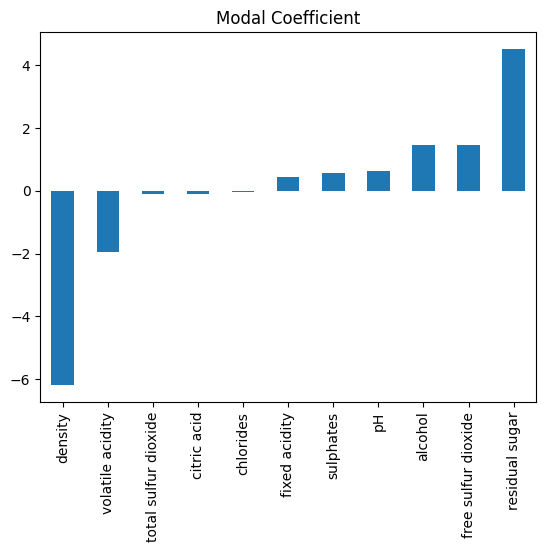

In [201]:
#Feature Selection Using Ridge

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

alpha=0.01 #Learning Rate
ridge =Ridge(alpha=alpha,normalize=False)


y_pred_ridge = ridge.fit(x_train,y_train).predict(x_test)
r2_score_ridge=r2_score(y_test,y_pred_ridge)
print(ridge)
print("r^2 on test data: %f " % r2_score_ridge)
predictors=normalized_df.columns.values[:11]


coef=pd.Series(ridge.coef_,predictors).sort_values()
coef.plot(kind='bar',title='Modal Coefficient')
plt.show()


### Feature Selection using Lasso

In [202]:
#Feature Selection using Lasso

from sklearn import linear_model
lasso_model = linear_model.Lasso(alpha=0.01,
                               positive=True,
                               fit_intercept=False, 
                               max_iter=1000,
                               tol=0.0001)
lasso_model.fit(x, y)

coeff  = lasso_model.coef_
df_coeff = pd.DataFrame({'Features':normalized_df.columns, 'scores': coeff})

selected_features = (list(df_coeff[df_coeff['scores'] > 0]['Features']))

print("Feature Selection using Lasso")
print(df_coeff.sort_values(by='scores',ascending=False))

Feature Selection using Lasso
                Features    scores
10               alcohol  4.008166
0          fixed acidity  3.999082
8                     pH  2.914496
6   total sulfur dioxide  2.245922
7                density  1.736856
3         residual sugar  1.487560
2            citric acid  1.324217
9              sulphates  0.937445
4              chlorides  0.734628
5    free sulfur dioxide  0.493060
1       volatile acidity  0.000000


### Correlation Matrix For Feature Elimination

In [203]:
correlation = white_wine_df.corr()
print(correlation['quality'].sort_values(ascending = False),'\n')

quality                 1.000000
alcohol                 0.435575
pH                      0.098842
sulphates               0.053620
free sulfur dioxide     0.008158
citric acid            -0.009170
residual sugar         -0.097410
fixed acidity          -0.114003
total sulfur dioxide   -0.174737
volatile acidity       -0.194700
chlorides              -0.210265
density                -0.307123
Name: quality, dtype: float64 



Index(['quality', 'alcohol', 'pH', 'sulphates', 'free sulfur dioxide',
       'citric acid', 'residual sugar', 'fixed acidity',
       'total sulfur dioxide', 'volatile acidity', 'chlorides', 'density'],
      dtype='object')


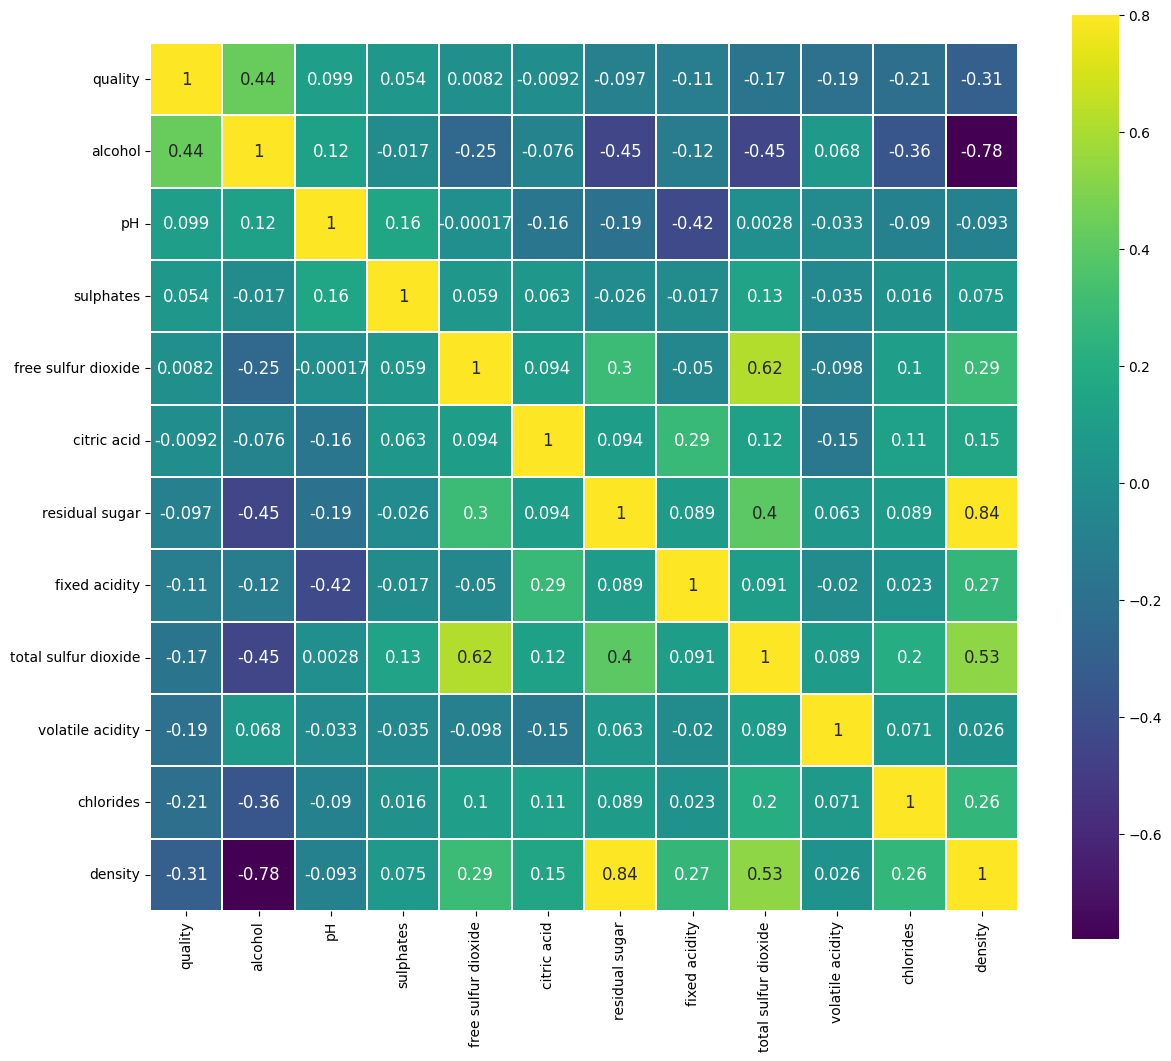

In [204]:
k= 12
cols = correlation.nlargest(k,'quality')['quality'].index
print(cols)
cm = np.corrcoef(white_wine_df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

#### From the above correlation matrix and feature selection technique we can drop features namely below
- volatile acidity
- density
- chlorides
- total sulfur dioxide
- fixed acidity
- residual sugar 
- citric acid


In [205]:
#Creating new Dataframe
new_df = normalized_df.drop(['volatile acidity', 'density', 'chlorides','residual sugar', 'fixed acidity','total sulfur dioxide','citric acid'], axis=1)

## Applying classification  after feature elimination

In [206]:
x=new_df.loc[:, new_df.columns != 'quality'].values
y = white_wine_df['quality'].values


validation_size=0.20
seed=42

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=validation_size,random_state=seed)

Logistic Regression
Training Score- Logistic Regression : 50.050955
Testing Score Logistic Regression: 49.08

Classification Report
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         5
           4       1.00      0.00      0.00        25
           5       0.51      0.47      0.49       291
           6       0.48      0.73      0.58       432
           7       0.56      0.16      0.24       192
           8       1.00      0.00      0.00        35

    accuracy                           0.49       980
   macro avg       0.76      0.23      0.22       980
weighted avg       0.54      0.49      0.45       980



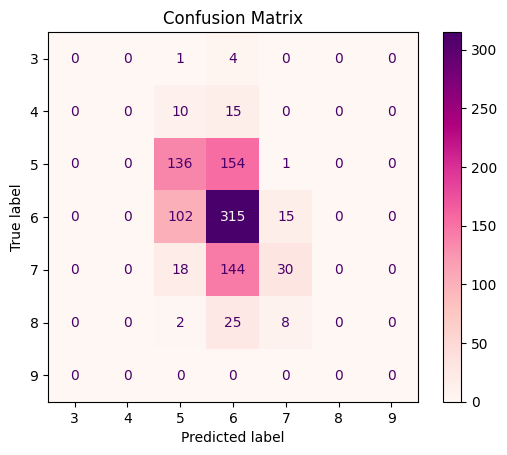



Decision Tree 
Training Score- Decision Tree  : 57.527989
Testing Score Decision Tree : 59.29

Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.18      0.24      0.20        25
           5       0.61      0.60      0.60       291
           6       0.67      0.62      0.64       432
           7       0.56      0.59      0.58       192
           8       0.35      0.51      0.41        35
           9       0.00      1.00      0.00         0

    accuracy                           0.59       980
   macro avg       0.34      0.51      0.35       980
weighted avg       0.60      0.59      0.60       980



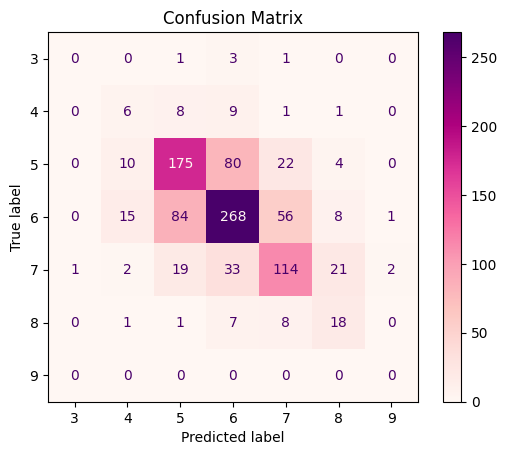



Random Forest
Training Score- Random Forest : 62.659325
Testing Score Random Forest: 66.73

Classification Report
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         5
           4       0.50      0.28      0.36        25
           5       0.66      0.66      0.66       291
           6       0.66      0.73      0.69       432
           7       0.72      0.64      0.68       192
           8       0.74      0.49      0.59        35

    accuracy                           0.67       980
   macro avg       0.71      0.47      0.50       980
weighted avg       0.67      0.67      0.66       980



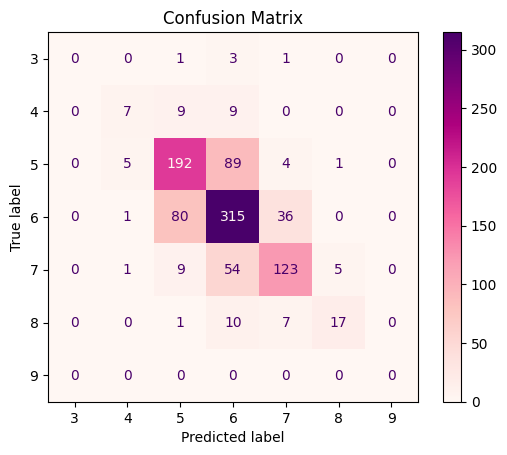



KNN
Training Score- KNN : 50.687993
Testing Score KNN: 51.94

Classification Report
              precision    recall  f1-score   support

           3       0.20      0.20      0.20         5
           4       0.09      0.16      0.12        25
           5       0.52      0.60      0.56       291
           6       0.59      0.55      0.57       432
           7       0.54      0.43      0.48       192
           8       0.26      0.26      0.26        35

    accuracy                           0.52       980
   macro avg       0.36      0.37      0.36       980
weighted avg       0.53      0.52      0.52       980



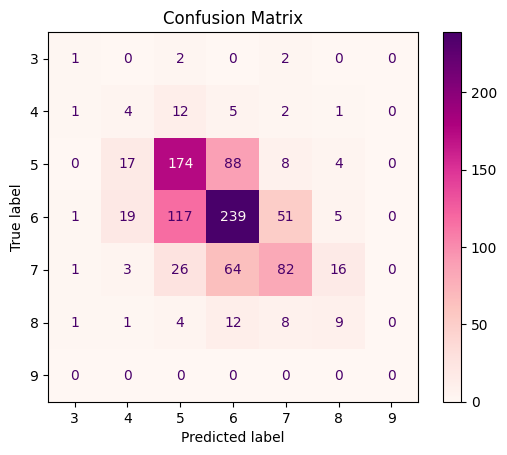

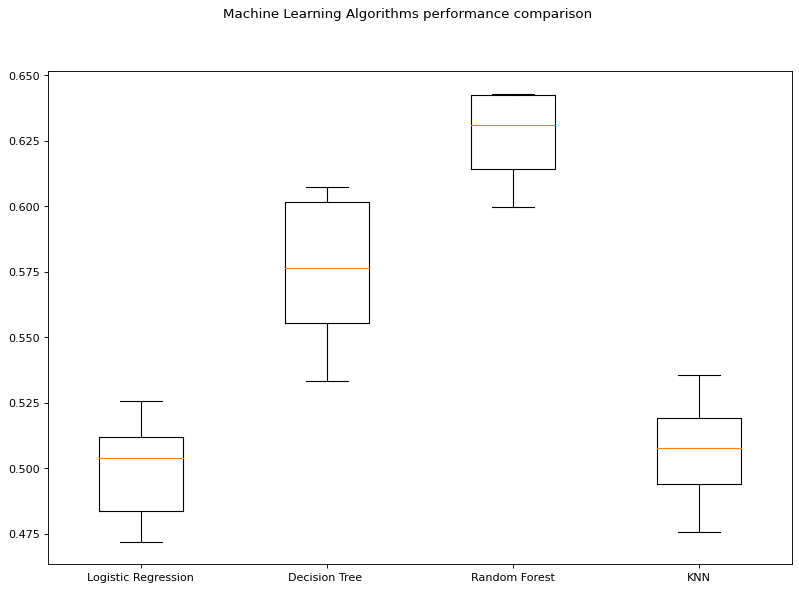

In [207]:
scoring='accuracy'
seed=48
test_size=0.2


results=[]
names=[]
num_folds=10
scoring='accuracy'
num_trees=100


models=[]
models.append(('Logistic Regression',LogisticRegression()))
models.append(('Decision Tree ',DecisionTreeClassifier(max_depth=None,max_features=None,criterion='entropy',min_samples_leaf=1,min_samples_split=2)))
models.append(('Random Forest',RandomForestClassifier(n_estimators=num_trees)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=3)))





for name, model in models:
    kflod=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
    model.fit(x_train,y_train)
    cv_results=cross_val_score(model,x_train,y_train,cv=kflod,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    cv_acc = cv_results.mean()*100
    msg="Training Score- %s : %f" % (name,cv_acc)
          
    y_test_pred=model.predict(x_test)
    acc =accuracy_score(y_test,y_test_pred)*100
    
    print('\x1b[1;31m'+name+'\x1b[0m')
    print(msg)
    print("Testing Score "+name+": %.2f"%acc+"\n")
    print("Classification Report")
    print(classification_report(y_test,y_test_pred, zero_division=1))
    
    
     #confusion_matrix
    cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot(cmap='RdPu')
    plt.title("Confusion Matrix")
    plt.show()
    
    print("\n")

fig = plt.figure(figsize=(12, 8), dpi=80)
fig.suptitle('Machine Learning Algorithms performance comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Selecting 2 Strongest Features

In [208]:
x=new_df[['alcohol','pH']].values
y = white_wine_df['quality'].values


validation_size=0.20
seed=42

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=validation_size,random_state=seed)

Logistic Regression
Training Score- Logistic Regression : 50.485085
Testing Score Logistic Regression: 49.39

Classification Report
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         5
           4       1.00      0.00      0.00        25
           5       0.51      0.52      0.51       291
           6       0.48      0.71      0.57       432
           7       0.53      0.15      0.23       192
           8       1.00      0.00      0.00        35

    accuracy                           0.49       980
   macro avg       0.75      0.23      0.22       980
weighted avg       0.53      0.49      0.45       980



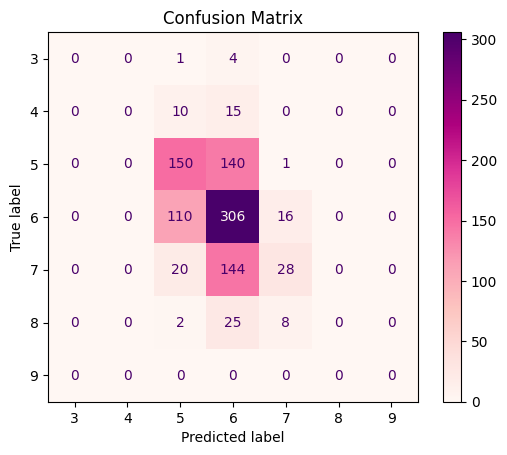



Decision Tree 
Training Score- Decision Tree  : 48.620687
Testing Score Decision Tree : 49.08

Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.12      0.20      0.15        25
           5       0.50      0.61      0.55       291
           6       0.53      0.49      0.51       432
           7       0.51      0.40      0.45       192
           8       0.33      0.26      0.29        35

    accuracy                           0.49       980
   macro avg       0.33      0.33      0.33       980
weighted avg       0.50      0.49      0.49       980



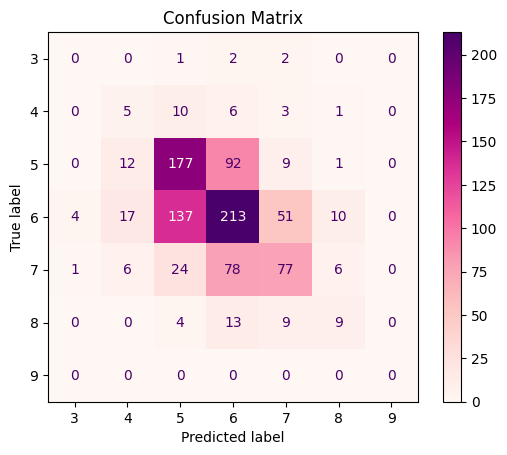



Random Forest
Training Score- Random Forest : 50.662809
Testing Score Random Forest: 50.71

Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.17      0.16      0.16        25
           5       0.55      0.57      0.56       291
           6       0.52      0.53      0.52       432
           7       0.49      0.47      0.48       192
           8       0.31      0.29      0.30        35

    accuracy                           0.51       980
   macro avg       0.34      0.34      0.34       980
weighted avg       0.50      0.51      0.51       980



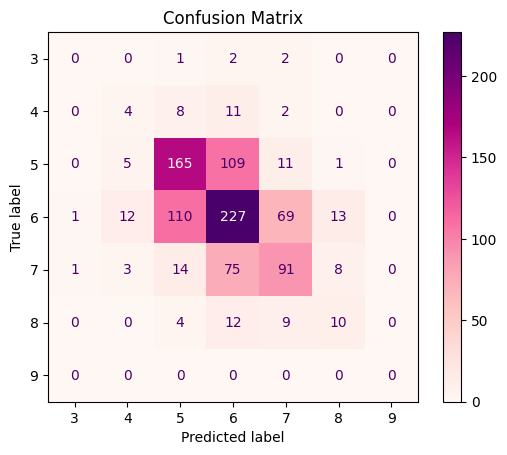



KNN
Training Score- KNN : 45.890574
Testing Score KNN: 47.14

Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.14      0.28      0.19        25
           5       0.47      0.53      0.50       291
           6       0.52      0.52      0.52       432
           7       0.49      0.35      0.41       192
           8       0.39      0.20      0.26        35

    accuracy                           0.47       980
   macro avg       0.33      0.31      0.31       980
weighted avg       0.48      0.47      0.47       980



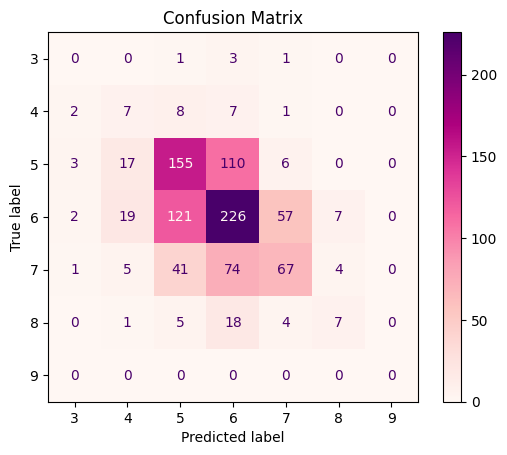

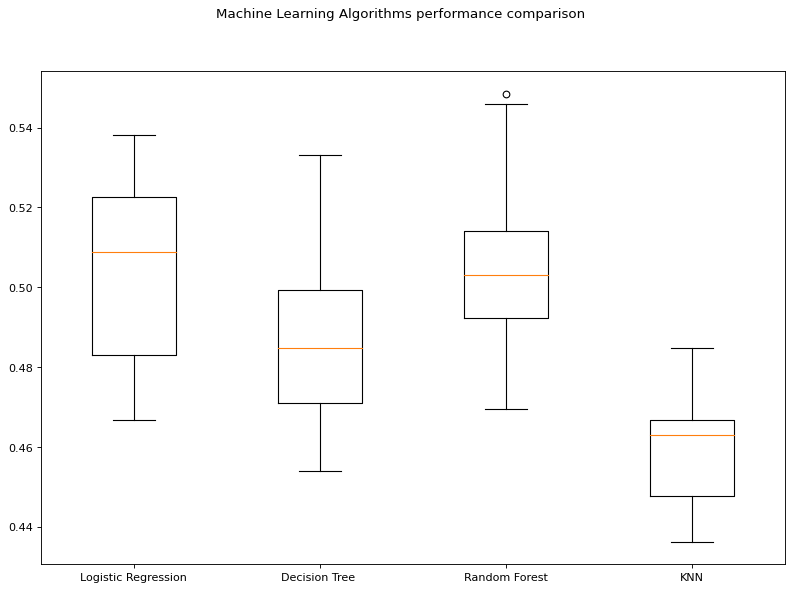

In [209]:
scoring='accuracy'
seed=48
test_size=0.2


results=[]
names=[]
num_folds=10
scoring='accuracy'
num_trees=100


models=[]
models.append(('Logistic Regression',LogisticRegression()))
models.append(('Decision Tree ',DecisionTreeClassifier(max_depth=None,max_features=None,criterion='entropy',min_samples_leaf=1,min_samples_split=2)))
models.append(('Random Forest',RandomForestClassifier(n_estimators=num_trees)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=3)))





for name, model in models:
    kflod=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
    model.fit(x_train,y_train)
    cv_results=cross_val_score(model,x_train,y_train,cv=kflod,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    cv_acc = cv_results.mean()*100
    msg="Training Score- %s : %f" % (name,cv_acc)
          
    y_test_pred=model.predict(x_test)
    acc =accuracy_score(y_test,y_test_pred)*100
    
    print('\x1b[1;31m'+name+'\x1b[0m')
    print(msg)
    print("Testing Score "+name+": %.2f"%acc+"\n")
    print("Classification Report")
    print(classification_report(y_test,y_test_pred, zero_division=1))
    
#     #confusion_matrix
    cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot(cmap='RdPu')
    plt.title("Confusion Matrix")
    plt.show() 
    print("\n")

fig = plt.figure(figsize=(12, 8), dpi=80)
fig.suptitle('Machine Learning Algorithms performance comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### From the above 2 Strongest Features we can see that the result decreases.

### Conclusion
- When we examine the specifics, we can find that high-quality wines typically have more alcohol, less volatile acidity, more sulfates, and more residual sugar.

- This analysis, however, has certain drawbacks. First, the uneven nature of our data set was the main issue. The majority of the quality indicators (5 and 6) were "regular," which had no bearing on identifying the best model. These figures made it more difficult to pinpoint each factor's unique impact on the wine's "high" or "poor" quality, which was the analysis's major goal. We solely used white wine for building the model in order to improve our prediction models.

- The fact that the data set only contained 13 attributes is another drawback that should be mentioned because it can reduce the precision with which we can estimate the white wine's grade. More pertinent data elements, such as the harvest year, brew time, location, or wine kind, can be added as a fix for this. With the aid of this analysis, wineries will be able to develop and market high-quality white wine-related items and anticipate the quality of the wines depending on specific characteristics.